# Curso de Capacitación en Python para Data Science - Sesión 3

<img src='https://www.danielsaromo.xyz/assets/img/logo-pucp.png' width=200px>


BSc. Stev Huamán (mhuamanr@pucp.edu.pe)

<font color='#33FFEE'> Desafío 2: Visualizacion de datos usando matplotlib y seaborn en data tabular y geoespacial.</font>

Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio2_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA. No se aceptarán entregas luego de haberse publicado el solucionario de la tarea.

# Uber Dataset Perú

Este conjunto de datos proviene de una startup de movilidad que permite a cualquier usuario reservar un viaje desde cualquier punto A hasta cualquier punto B dentro de la ciudad utilizando un teléfono inteligente. El valor del viaje se calcula automáticamente en el momento de la solicitud mediante la aplicación, teniendo en cuenta la distancia, el tiempo de viaje estimado y la disponibilidad actual de vehículos (equilibrio entre la demanda y la oferta).

Una vez que el viaje termina, cargamos la tarjeta de crédito del pasajero y transferimos X% de este valor a la cuenta bancaria del conductor. Finalmente, antes de que el pasajero sea recogido, el viaje puede ser cancelado tanto por el conductor como por el pasajero.

Un análisis descriptivo de los datos podría incluir:

- ¿Cuántos? (por ejemplo, vehículos, pasajeros, conductores).
- ¿Cuándo? (por ejemplo, viajes/precio/costo por período de tiempo, ¿son los viajes rápidos?).
- ¿Qué? (por ejemplo, reservas/inmediatas, tipo de vehículo).
- ¿Quiénes? (por ejemplo, peores pasajeros, mejores conductores).
- Cualquier pregunta que consideres interesante.

## Análisis Inicial del Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Si agregas esa línea, ya no necesitarás escribir plt.show() en tu código, simplemente agrega un punto y coma (;) al final de la última línea del código
%matplotlib inline

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Establece el número máximo de columnas a mostrar al imprimir un DataFrame
pd.options.display.max_columns = 300

In [4]:
#data = pd.read_csv('uber_peru_2010.csv', sep=';')
data = pd.read_csv('https://raw.githubusercontent.com/CristhianCastro25/Programacion_Analisis_Exploratorio/main/uber_peru_2010.csv', sep=';')

In [5]:
data.head(5)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,16/11/2010 16:44,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:34,"-12,13874817","-76,99536133",01/06/2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,31/05/2010 5:01,"-12,12453079","-77,02780151",31/05/2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:29,"-12,13885117","-76,99530029",01/06/2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,11/09/2010 23:55,"-12,08995438","-76,92626953",12/09/2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11/09/2010 23:50,PEN,8227.0,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0


0. Convertir a español los labels de las columnas


In [6]:
# Convertir a español los nombres de las columnas
data.columns = [
    'journey_id -- id_viaje',
    'user_id -- id_usuario',
    'driver_id -- id_conductor',
    'taxi_id -- id_taxi',
    'icon -- icono',
    'start_type -- tipo_de_inicio',
    'start_at -- inicio_en',
    'start_lat -- latitud_de_inicio',
    'start_lon -- longitud_de_inicio',
    'end_at -- fin_en',
    'end_lat -- latitud_de_fin',
    'end_lon -- longitud_de_fin',
    'end_state -- estado_final',
    'driver_start_lat -- latitud_de_inicio_del_conductor',
    'driver_start_lon -- longitud_de_inicio_del_conductor',
    'arrived_at -- llegada_en',
    'currency -- moneda',
    'price -- precio',
    'price_distance -- distancia_de_precio',
    'price_duration -- duracion_de_precio',
    'distance -- distancia',
    'duration -- duracion',
    'cost -- costo',
    'cost_distance -- distancia_de_costo',
    'cost_duration -- duracion_de_costo',
    'source -- fuente',
    'driver_score -- puntuacion_del_conductor',
    'rider_score -- puntuacion_del_pasajero'
]

1. Indicar el tamaño del dataframe, cantidad de filas y de columnas ( 1 punto)

In [7]:
data.shape

(23111, 28)

Visualizamos los primeros 5 elementos del dataframe

Para poder visualizar todas las columnas:

In [8]:
pd.set_option('display.max_columns', None)

2. Indica la cantidad y proporción de valores nulos por cada columna.  ( 2 puntos)
 - ¿Qué conclusiones o qué tratamiento le podemos dar a los datos faltantes?
 - Los datos faltan por error de lectura o por alguna otra razón?

<span style="color: green;">Respuesta propia:</span> \
Eliminar las filas con valores nulos si representan una pequeña proporción de los datos. \
Imputar los valores faltantes con la media, mediana o moda de la columna, dependiendo del tipo de datos. \
Los datos pueden faltar por diversas razones, como errores de entrada, problemas de recolección de datos en la data orgánica o de procesos, o simplemente porque la información no estaba disponible o se desconocia en el momento de la recolección de la data diseñada o a medida.

<span style="color: green;">Respuesta solucion:</span> \
Para los datos faltantes se podrian elimirar los registros si los datos fueran pocos y
no se perdiera mucha data, también se podrian imputar los valores por ceros, por la media,
mediana o moda, asi también se puden predecir por algun modelo de regresion lineal, segun sea el caso.

In [9]:
# Indicar la cantidad de valores nulos por columna
missing_values = data.isnull().sum()

# Calcular la proporción de valores nulos por columna (media o promedio)
missing_proportion = (data.isnull().mean() * 100).round(2)
missing_proportion = missing_proportion.astype(str) + ' %'

# Mostrar las Series
print('\nmissing_values: \n', missing_values)
print('\nmissing_proportion: \n', missing_proportion)


missing_values: 
 journey_id -- id_viaje                                      0
user_id -- id_usuario                                       0
driver_id -- id_conductor                                3385
taxi_id -- id_taxi                                       3385
icon -- icono                                               0
start_type -- tipo_de_inicio                                0
start_at -- inicio_en                                       0
start_lat -- latitud_de_inicio                              0
start_lon -- longitud_de_inicio                             0
end_at -- fin_en                                          276
end_lat -- latitud_de_fin                                   0
end_lon -- longitud_de_fin                                  0
end_state -- estado_final                                  12
driver_start_lat -- latitud_de_inicio_del_conductor      3490
driver_start_lon -- longitud_de_inicio_del_conductor     3490
arrived_at -- llegada_en                           

In [10]:
# Combinar los resultados en un DataFrame
missing_data = pd.DataFrame({'Cantidad de Valores Nulos': missing_values, 'Proporción de Valores Nulos': missing_proportion})

# Mostrar el DataFrame con la información de valores nulos
missing_data

,Cantidad de Valores Nulos,Proporción de Valores Nulos
journey_id -- id_viaje,0,0.0 %
user_id -- id_usuario,0,0.0 %
driver_id -- id_conductor,3385,14.65 %
taxi_id -- id_taxi,3385,14.65 %
icon -- icono,0,0.0 %
start_type -- tipo_de_inicio,0,0.0 %
start_at -- inicio_en,0,0.0 %
start_lat -- latitud_de_inicio,0,0.0 %
start_lon -- longitud_de_inicio,0,0.0 %
end_at -- fin_en,276,1.19 %


In [11]:
len(data)

23111

In [12]:
# Obtener cantidad de valores unicos
# Journey_id corresponde a un id nico de cada viaje. Entonces la cantidad nica de journey_id corresponde al total de filas del dataset.
data['journey_id -- id_viaje'].nunique()

23111

In [13]:
# Existen 1390 usuarios distintos
data['user_id -- id_usuario'].nunique()

1390

In [14]:
# Y 168 drivers
data['driver_id -- id_conductor'].nunique()

168

## Análisis Univariado

Un análisis univariado es una técnica de análisis de datos que se centra en examinar una sola variable a la vez. En este tipo de análisis, se estudian las características y distribución de una variable de forma individual, sin considerar la relación con otras variables. El objetivo principal es entender la estructura y comportamiento de una variable en particular, identificando tendencias, patrones, valores atípicos y características descriptivas de esa variable.

En resumen, el análisis univariado se enfoca en explorar y describir una variable de manera aislada, sin tener en cuenta la interacción con otras variables, lo que proporciona una visión detallada y específica de esa variable en particular.

In [15]:
# Obtener cantidad de valores unicos
for columna in data.columns:
    conteo_valores_unicos = data[columna].nunique()
    print(f"Columna '{columna}': {conteo_valores_unicos} valores únicos")

Columna 'journey_id -- id_viaje': 23111 valores únicos
Columna 'user_id -- id_usuario': 1390 valores únicos
Columna 'driver_id -- id_conductor': 168 valores únicos
Columna 'taxi_id -- id_taxi': 213 valores únicos
Columna 'icon -- icono': 3 valores únicos
Columna 'start_type -- tipo_de_inicio': 3 valores únicos
Columna 'start_at -- inicio_en': 20987 valores únicos
Columna 'start_lat -- latitud_de_inicio': 11753 valores únicos
Columna 'start_lon -- longitud_de_inicio': 8489 valores únicos
Columna 'end_at -- fin_en': 21780 valores únicos
Columna 'end_lat -- latitud_de_fin': 12266 valores únicos
Columna 'end_lon -- longitud_de_fin': 9084 valores únicos
Columna 'end_state -- estado_final': 6 valores únicos
Columna 'driver_start_lat -- latitud_de_inicio_del_conductor': 18425 valores únicos
Columna 'driver_start_lon -- longitud_de_inicio_del_conductor': 18314 valores únicos
Columna 'arrived_at -- llegada_en': 17156 valores únicos
Columna 'currency -- moneda': 1 valores únicos
Columna 'price -

In [16]:
# Obtener cantidad de valores unicos
data.nunique()

journey_id -- id_viaje                                  23111
user_id -- id_usuario                                    1390
driver_id -- id_conductor                                 168
taxi_id -- id_taxi                                        213
icon -- icono                                               3
start_type -- tipo_de_inicio                                3
start_at -- inicio_en                                   20987
start_lat -- latitud_de_inicio                          11753
start_lon -- longitud_de_inicio                          8489
end_at -- fin_en                                        21780
end_lat -- latitud_de_fin                               12266
end_lon -- longitud_de_fin                               9084
end_state -- estado_final                                   6
driver_start_lat -- latitud_de_inicio_del_conductor     18425
driver_start_lon -- longitud_de_inicio_del_conductor    18314
arrived_at -- llegada_en                                17156
currency

In [17]:
# Obtener y almacenar la cantidad única de valores por cada columna
conteo_valores_unicos = data.nunique().reset_index()
conteo_valores_unicos.columns = ['Columna', 'Unique_values']

# Mostrar el DataFrame con el conteo de valores únicos
conteo_valores_unicos.sort_values('Unique_values')

,Columna,Unique_values
16,currency -- moneda,1
4,icon -- icono,3
5,start_type -- tipo_de_inicio,3
25,source -- fuente,5
27,rider_score -- puntuacion_del_pasajero,6
12,end_state -- estado_final,6
26,driver_score -- puntuacion_del_conductor,6
2,driver_id -- id_conductor,168
3,taxi_id -- id_taxi,213
1,user_id -- id_usuario,1390


In [18]:
# Creamos una lista con todas las variables categóricas 
"""
Revisar PDF "2 Sesion_3_Visualización_de_datos.pdf", diapositiva 12
    - Las variables categorias son las que permiten clasificar o jerarquizar
    - Las variables numericas son las que permiten contar o medir
Las variables en el array "var_cat" son categorias, tienen menos cantidad de valores unicos
"""
var_cat = [
    'icon -- icono',
    'start_type -- tipo_de_inicio',
    'source -- fuente',
    'rider_score -- puntuacion_del_pasajero',
    'end_state -- estado_final',
    'driver_score -- puntuacion_del_conductor'
]

In [19]:
data['start_type -- tipo_de_inicio'].value_counts()

start_type -- tipo_de_inicio
asap        14865
reserved     8226
delayed        20
Name: count, dtype: int64

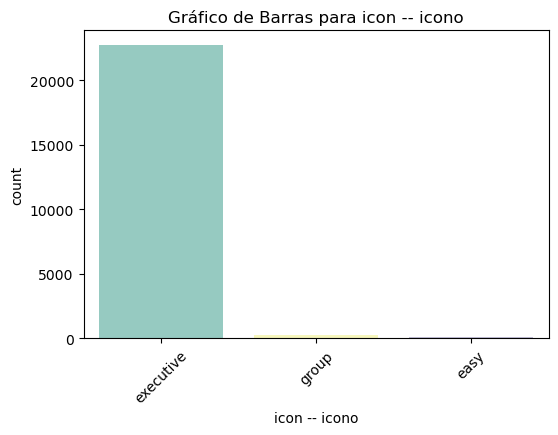

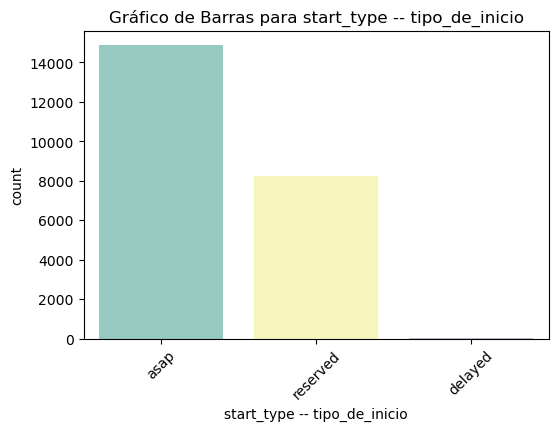

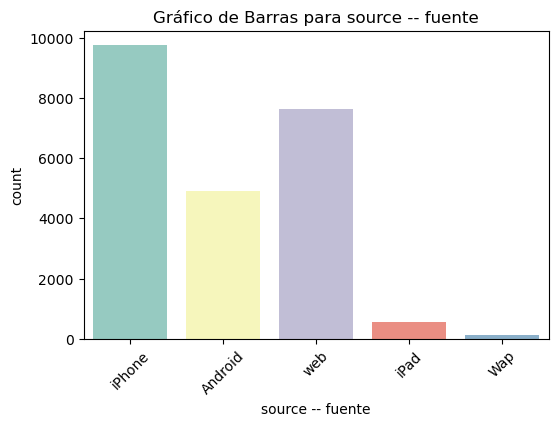

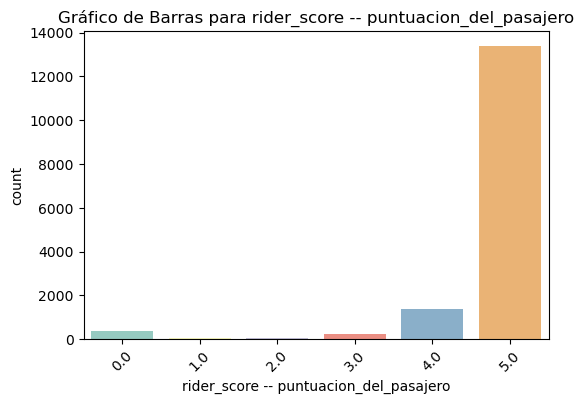

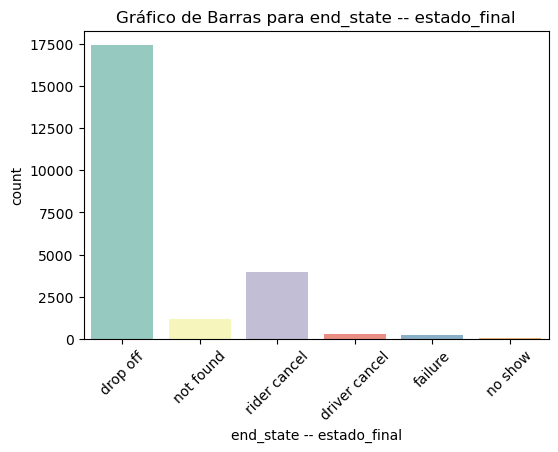

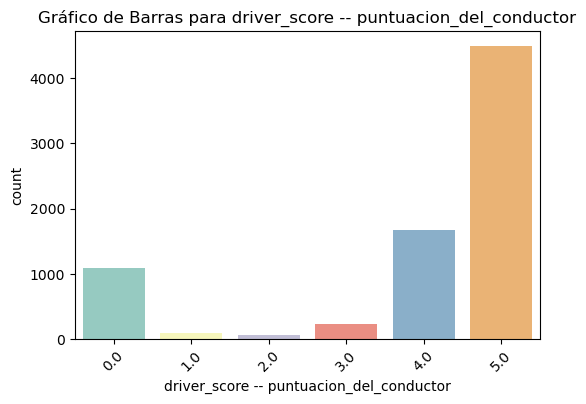

In [20]:
# Generar un gráfico de barras para cada variable categórica
for columna in var_cat:
    plt.figure(figsize=(6, 4))  # figsize=(8, 6)
    sns.countplot(data=data, x=columna, palette="Set3")  # Puedes cambiar la paleta de colores si lo deseas
    plt.title(f'Gráfico de Barras para {columna}')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
    plt.show()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   journey_id -- id_viaje                                23111 non-null  object 
 1   user_id -- id_usuario                                 23111 non-null  object 
 2   driver_id -- id_conductor                             19726 non-null  object 
 3   taxi_id -- id_taxi                                    19726 non-null  object 
 4   icon -- icono                                         23111 non-null  object 
 5   start_type -- tipo_de_inicio                          23111 non-null  object 
 6   start_at -- inicio_en                                 23111 non-null  object 
 7   start_lat -- latitud_de_inicio                        23111 non-null  object 
 8   start_lon -- longitud_de_inicio                       23

3. Realizar un análisis univariado de las columnas que considere relevante . Incluya los tipos de gráficos que considere apropiados y comente sus resultados (3 puntos)

    A partir del gráfico de histograma de precios en soles por día de la semana, se pueden inferir lo siguiente:

    1. **Distribución de Precios**: La mayoría de los viajes tienen un precio bajo, independientemente del día de la semana. Esto se observa porque la mayor parte de los datos se concentran en los primeros intervalos de precios.

    2. **Días con Mayor Cantidad de Viajes**: Los lunes y los sábados parecen ser los días con la mayor cantidad de viajes, ya que los histogramas para estos días tienen las barras más altas en comparación con otros días.

    3. **Días con Menor Cantidad de Viajes**: Los martes y miercoles parecen ser los días con la menor cantidad de viajes, ya que los histogramas para estos días tienen las barras más bajas en comparación con otros días.

    4. **Variabilidad de Precios**: Aunque la mayoría de los viajes tienen precios bajos, hay algunos viajes con precios significativamente más altos. Sin embargo, estos son menos frecuentes.

    5. **Consistencia en la Distribución**: La forma de la distribución de precios es bastante similar a lo largo de los días de la semana, lo que sugiere que no hay grandes variaciones en los precios de los viajes entre diferentes días.

    6. **Outliers**: Hay algunos valores atípicos (outliers) con precios muy altos, especialmente visibles en los días lunes y martes. Los outliers de los dias martes y miercoles comienzan a partir de los S/ 90.00.

    En resumen, se puede inferir que la mayoría de los viajes tienen precios bajos y que los lunes y sábados son los días con mayor actividad en términos de cantidad de viajes.

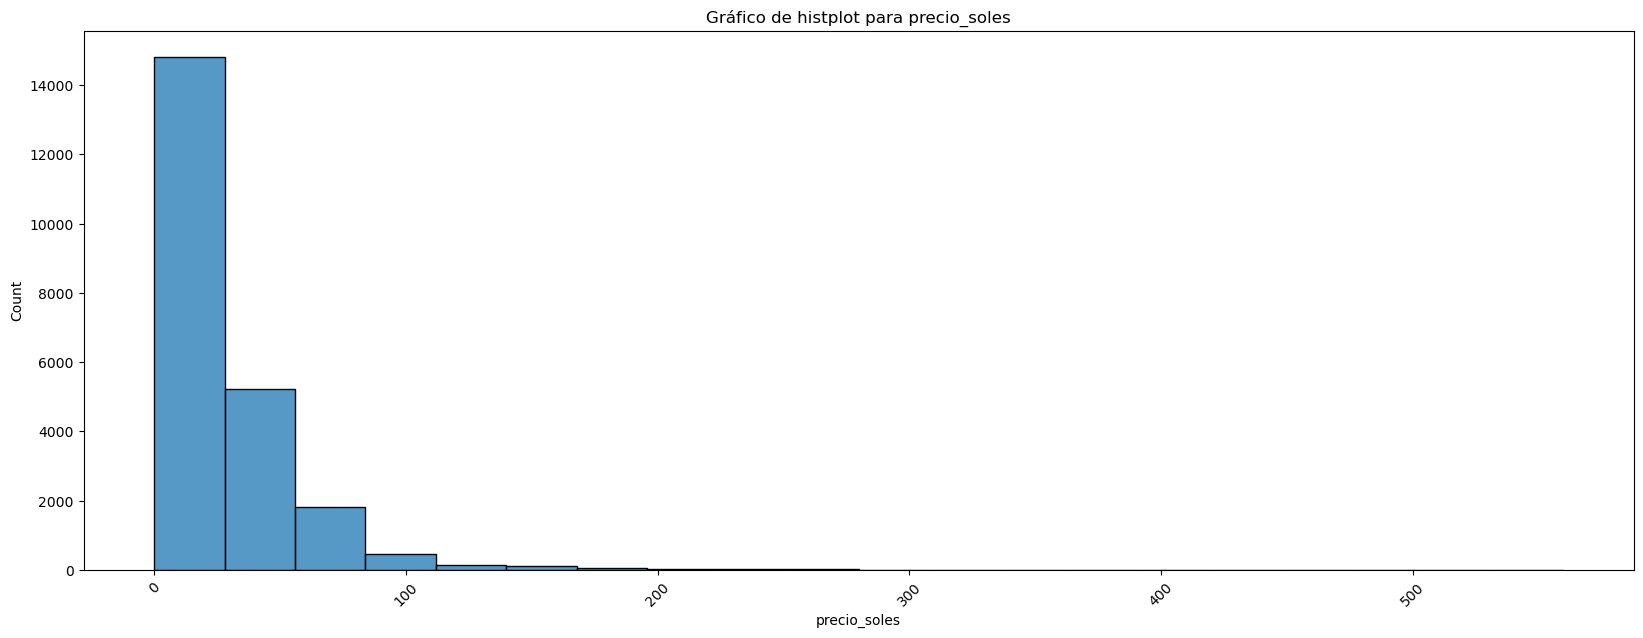

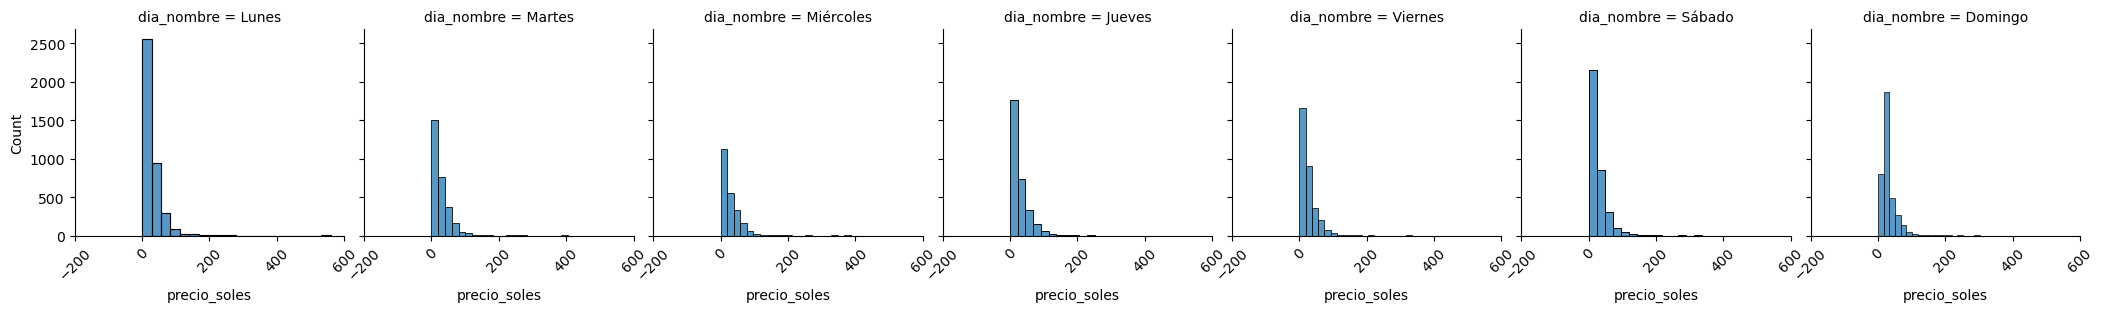

---


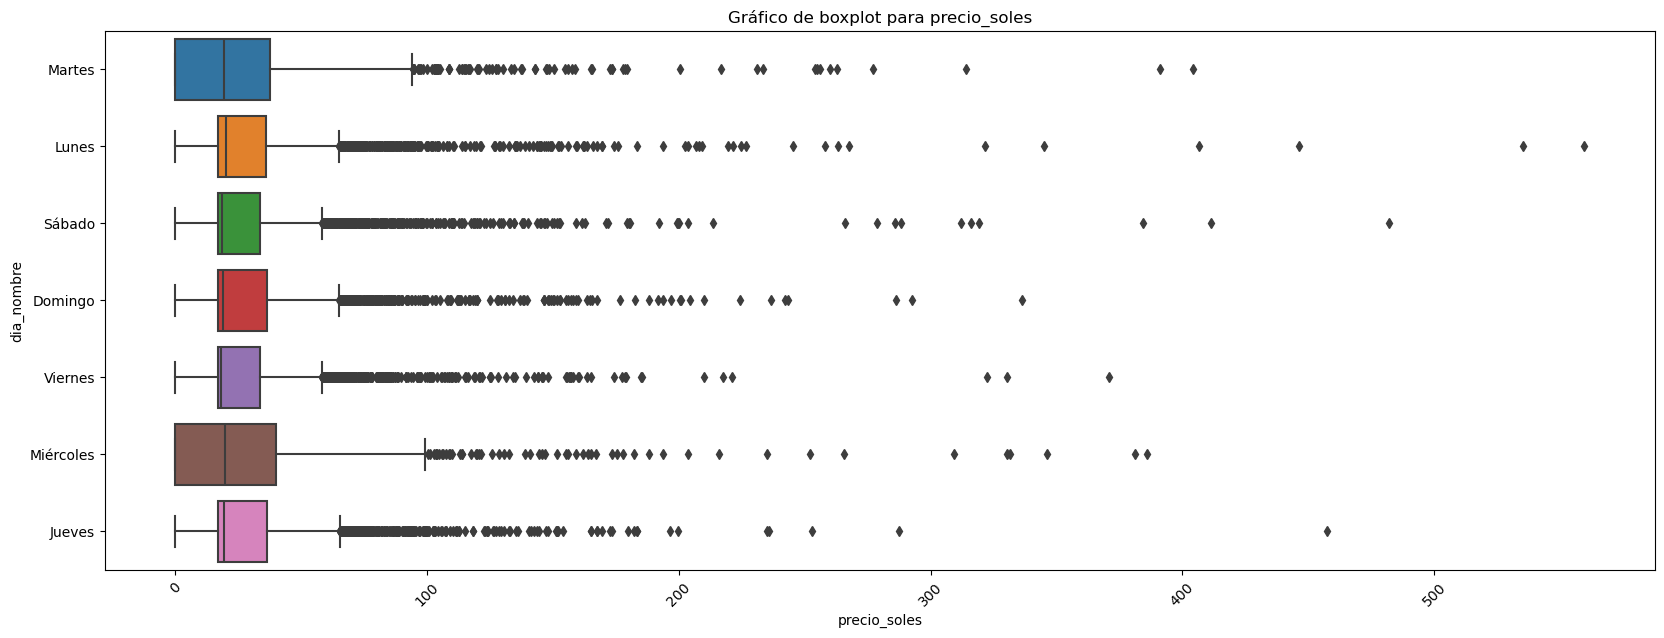

---


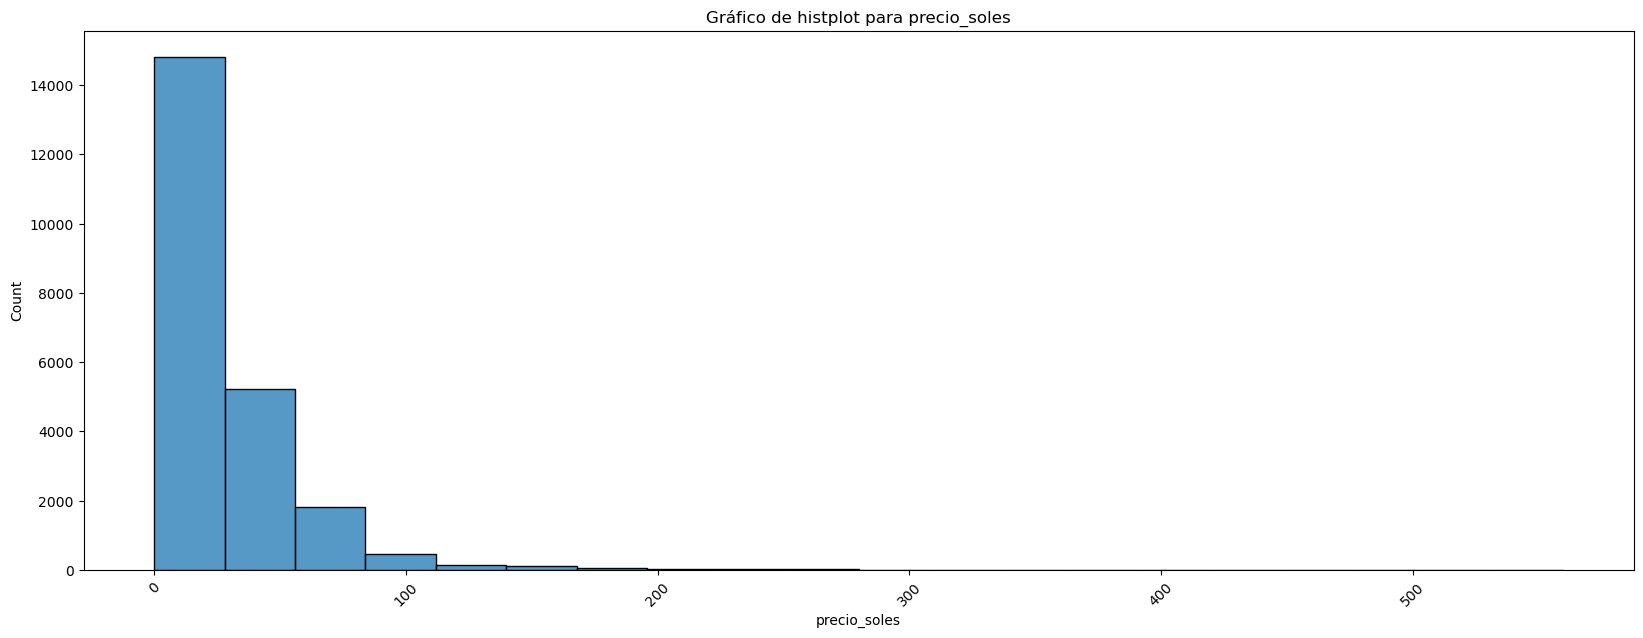

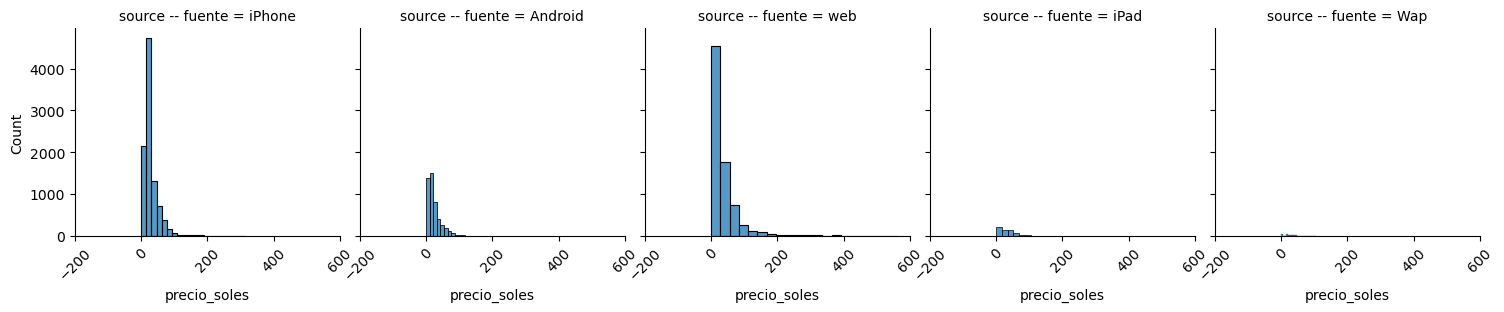

---


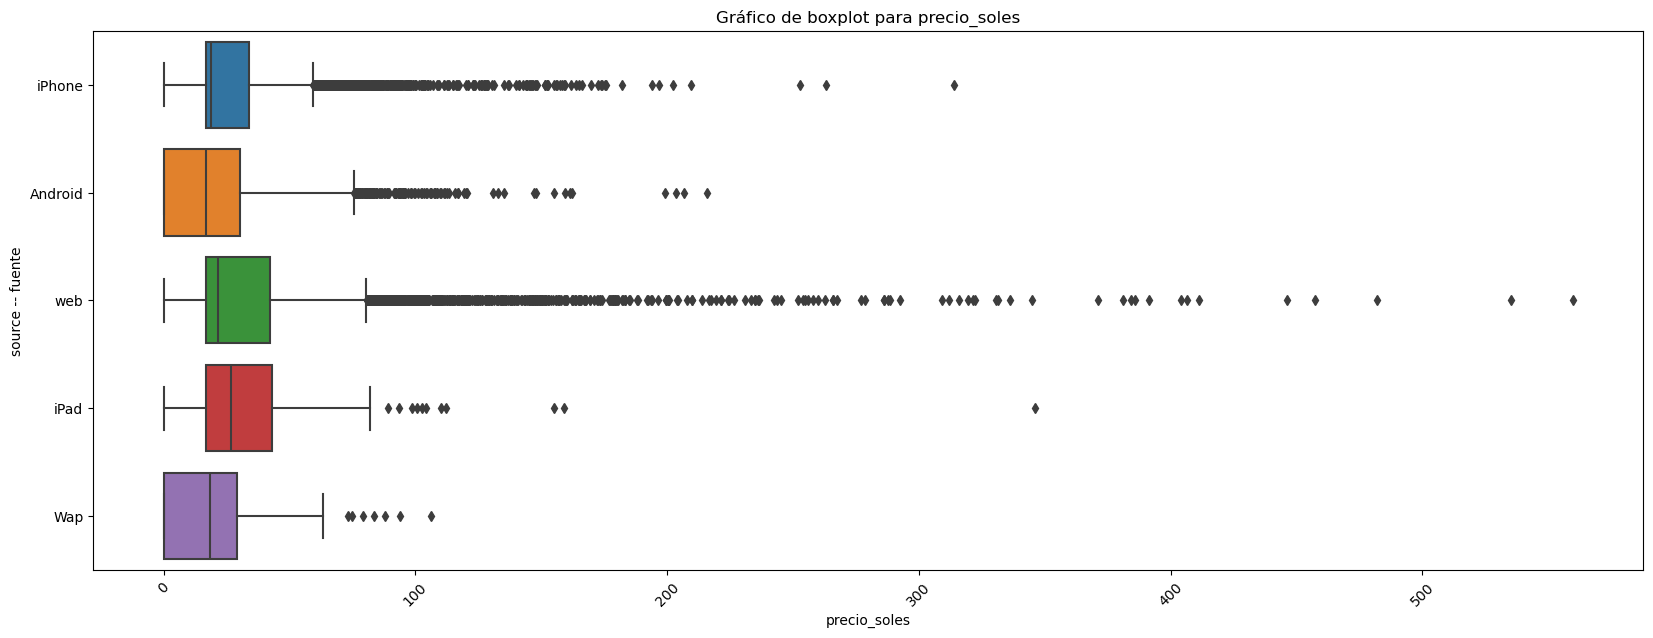

---


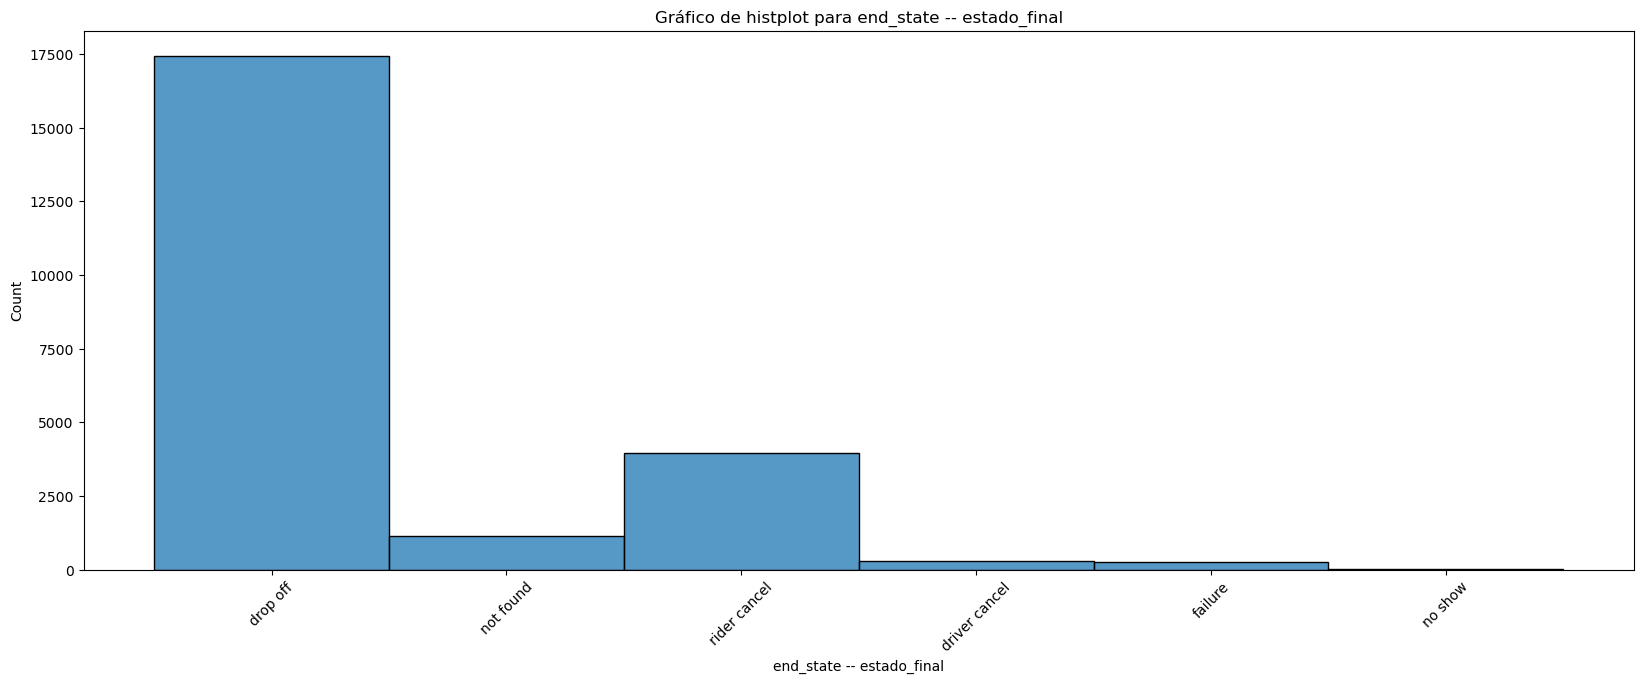

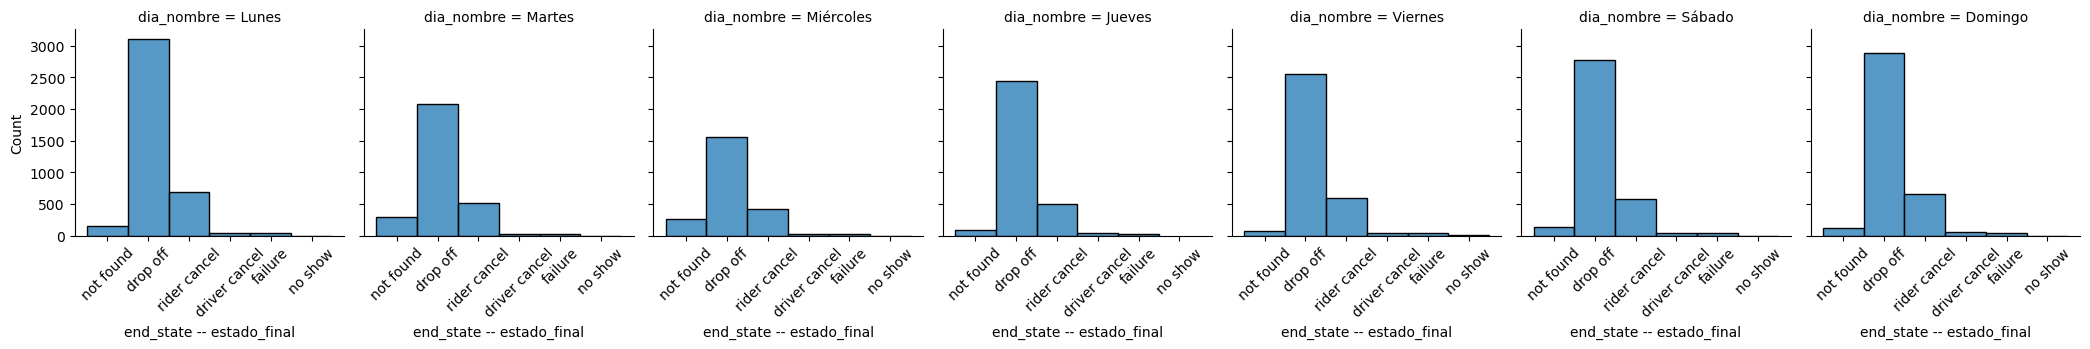

---


In [22]:
# Escribir código

# Obtener columna precio en soles
data['precio_soles'] = data['price -- precio'] / 100  # Convertir la duración de centimos a soles

# Obtener el día de la semana en base a la columna 'start_at -- inicio_en'
data['start_at -- inicio_en'] = pd.to_datetime(data['start_at -- inicio_en'], format="%d/%m/%Y %H:%M")
data['dia_nombre'] = data['start_at -- inicio_en'].dt.day_name().map({
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
})

# Seleccionar columnas relevantes para el análisis univariado
columns_of_interest = [
    # Analisis de precio en soles x dia de la semana
    {
        'type': 'histogram',
        'column': 'precio_soles',   
        'col_map': 'dia_nombre',
        'sort': 'dia_nombre',
    },
    {
        'type': 'boxplot',
        'column_x': 'precio_soles',
        'column_y': 'dia_nombre',
        'sort': 'dia_nombre',
    },
    # Analisis de precio en soles x fuente de solicitud
    {
        'type': 'histogram',
        'column': 'precio_soles',   
        'col_map': 'source -- fuente',
        'sort': ''
    },
    {
        'type': 'boxplot',
        'column_x': 'precio_soles',
        'column_y': 'source -- fuente',        
        'sort': ''
    },
    # Analisis de estado final x dia de la semana
    {
        'type': 'histogram',
        'column': 'end_state -- estado_final',
        'col_map': 'dia_nombre',
        'sort': 'dia_nombre',
    },    
]

# Realizar un análisis univariado de las columnas seleccionadas
for value in columns_of_interest: 
    if (value['type'] == 'histogram'):
        plt.figure(figsize=(20, 7))
        sns.histplot(data=data, x=value['column'], bins=20)
        plt.title(f"Gráfico de histplot para {value['column']}")
        plt.xticks(rotation=45)
        
        if value['sort'] == 'dia_nombre':
            g = sns.FacetGrid(data, col=value['col_map'], col_order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
        else:
            g = sns.FacetGrid(data, col=value['col_map'])        
        # g = sns.FacetGrid(data, col=value['col_map'])
        g.map(sns.histplot, value['column'], bins=20)
        # g.set_titles(f"Gráfico de histplot para {value['column']}")
        g.set_xticklabels(rotation=45)  # Rotar las etiquetas del eje x
        
        plt.show()
        print("---")
    
    elif (value['type'] == 'boxplot'):
        plt.figure(figsize=(20, 7))
        if value['sort'] == 'dia_semana':
            sns.boxplot(data=data, x=value['column_x'], y=value['column_y'], order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
        else:
            sns.boxplot(data=data, x=value['column_x'], y=value['column_y'])
        # sns.boxplot(data=data, x=value['column_x'], y=value['column_y'])
        plt.title(f"Gráfico de boxplot para {value['column_x']}")
        plt.xticks(rotation=45)
        plt.show()
        print("---")

El campo **start_at** es object, sin emabrgo indica la fecha y hora donde fue tomado el taxi. Podemos convertir a tipo de dato datetime de pandas usando:

In [23]:
data['start_at -- inicio_en'] = pd.to_datetime(data['start_at -- inicio_en'], format="%d/%m/%Y %H:%M")

In [24]:
data.head()

,journey_id -- id_viaje,user_id -- id_usuario,driver_id -- id_conductor,taxi_id -- id_taxi,icon -- icono,start_type -- tipo_de_inicio,start_at -- inicio_en,start_lat -- latitud_de_inicio,start_lon -- longitud_de_inicio,end_at -- fin_en,end_lat -- latitud_de_fin,end_lon -- longitud_de_fin,end_state -- estado_final,driver_start_lat -- latitud_de_inicio_del_conductor,driver_start_lon -- longitud_de_inicio_del_conductor,arrived_at -- llegada_en,currency -- moneda,price -- precio,price_distance -- distancia_de_precio,price_duration -- duracion_de_precio,distance -- distancia,duration -- duracion,cost -- costo,cost_distance -- distancia_de_costo,cost_duration -- duracion_de_costo,source -- fuente,driver_score -- puntuacion_del_conductor,rider_score -- puntuacion_del_pasajero,precio_soles,dia_nombre
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0,38.21,Martes
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",01/06/2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,0.00,Martes
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",31/05/2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,0.00,Lunes
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",01/06/2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,0.00,Martes
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",12/09/2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11/09/2010 23:50,PEN,8227.0,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0,82.27,Sábado


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 30 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   journey_id -- id_viaje                                23111 non-null  object        
 1   user_id -- id_usuario                                 23111 non-null  object        
 2   driver_id -- id_conductor                             19726 non-null  object        
 3   taxi_id -- id_taxi                                    19726 non-null  object        
 4   icon -- icono                                         23111 non-null  object        
 5   start_type -- tipo_de_inicio                          23111 non-null  object        
 6   start_at -- inicio_en                                 23111 non-null  datetime64[ns]
 7   start_lat -- latitud_de_inicio                        23111 non-null  object

Podemos crear distintos atributos usando el campo start_at:

In [26]:
data['mes'] = data['start_at -- inicio_en'].dt.month
data['year'] = data['start_at -- inicio_en'].dt.year
data['date'] = data['start_at -- inicio_en'].dt.date
data['hour'] = data['start_at -- inicio_en'].dt.hour

data['MonthDayNum'] = data['start_at -- inicio_en'].dt.day
data['DayOfWeek'] = data['start_at -- inicio_en'].dt.day_name()
data['DayOfWeek_i'] = data['start_at -- inicio_en'].dt.weekday

In [27]:
data

,journey_id -- id_viaje,user_id -- id_usuario,driver_id -- id_conductor,taxi_id -- id_taxi,icon -- icono,start_type -- tipo_de_inicio,start_at -- inicio_en,start_lat -- latitud_de_inicio,start_lon -- longitud_de_inicio,end_at -- fin_en,end_lat -- latitud_de_fin,end_lon -- longitud_de_fin,end_state -- estado_final,driver_start_lat -- latitud_de_inicio_del_conductor,driver_start_lon -- longitud_de_inicio_del_conductor,arrived_at -- llegada_en,currency -- moneda,price -- precio,price_distance -- distancia_de_precio,price_duration -- duracion_de_precio,distance -- distancia,duration -- duracion,cost -- costo,cost_distance -- distancia_de_costo,cost_duration -- duracion_de_costo,source -- fuente,driver_score -- puntuacion_del_conductor,rider_score -- puntuacion_del_pasajero,precio_soles,dia_nombre,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0,38.21,Martes,11,2010,2010-11-16,16,16,Tuesday,1
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",01/06/2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,0.00,Martes,6,2010,2010-06-01,0,1,Tuesday,1
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",31/05/2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,0.00,Lunes,5,2010,2010-05-31,5,31,Monday,0
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",01/06/2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,0.00,Martes,6,2010,2010-06-01,0,1,Tuesday,1
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",12/09/2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11/09/2010 23:50,PEN,8227.0,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0,82.27,Sábado,9,2010,2010-09-11,23,11,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",31/07/2010 13:27,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",31/07/2010 13:15,PEN,1700.0,509.0,337.0,1590.0,404.0,0.0,NaN,NaN,iPhone,5.0,5.0,17.00,Sábado,7,2010,2010-07-31,13,31,Saturday,5
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",02/10/2010 5:56,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",02/10/2010 5:39,PEN,1923.0,1923.0,0.0,6010.0,0.0,188500.0,1346.0,0.0,Android,NaN,5.0,19.23,Sábado,10,2010,2010-10-02,5,2,Saturday,5
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",21/09/2010 10:18,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",21/09/2010 10:05,PEN,1700.0,1478.0,109.0,4620.0,131.0,1450.0,1109.0,81.0,Android,0.0,0.0,17.00,Martes,9,2010,2010

In [28]:
# Visualicemos la cantidad total de viajes por día de semana.
uber2010_weekdays = data.pivot_table(index=['DayOfWeek_i','DayOfWeek'], values='journey_id -- id_viaje', aggfunc='count')
uber2010_weekdays

,,journey_id -- id_viaje
DayOfWeek_i,DayOfWeek,
0,Monday,4026
1,Tuesday,2965
2,Wednesday,2324
3,Thursday,3134
4,Friday,3334
5,Saturday,3574
6,Sunday,3754


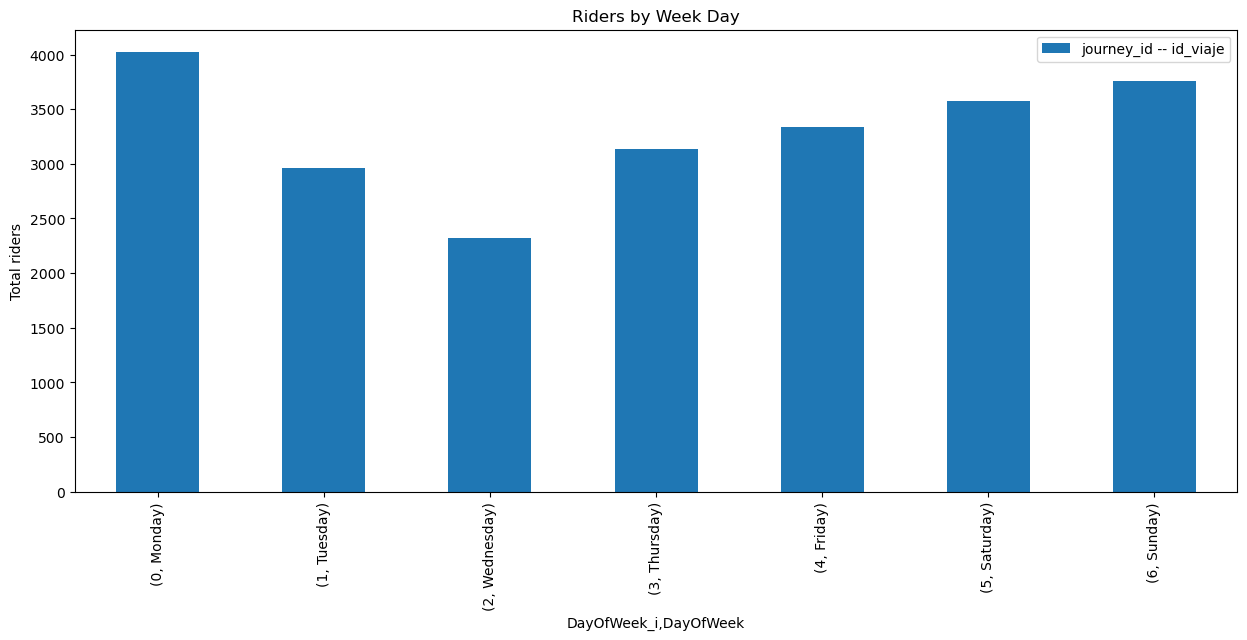

In [29]:
uber2010_weekdays.plot(kind='bar', figsize=(15,6))
plt.ylabel('Total riders')
#plt.set_xticklabels(x_labels)
plt.title('Riders by Week Day');

<Axes: xlabel='date'>

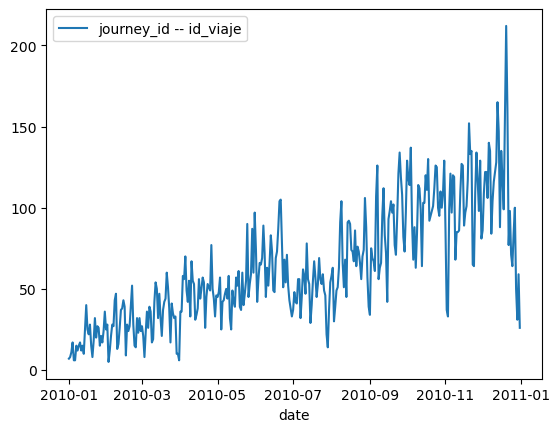

In [30]:
data.groupby('date').agg({'journey_id -- id_viaje':'count'}).plot()

4. Mostrar gráficos de barras o líneas para identificar patrones de viajes. ( 6 puntos)

- ¿Los viajes son más frecuentes los fines de semana o durante la semana?

    - Los viajes parecen ser más frecuentes los fines de semana, especialmente los sábados y domingo, según el análisis de la cantidad de viajes por día de la semana.

- ¿Cómo es la tendencia mes a mes? A qué se debe esto?

    - La tendencia mes a mes es que el uso de Uber aumente, las personas año a año consumen mas y mas.

- ¿Cómo varía la distribución a lo largo del día? Existen diferencias entre los distintos tipos de viajes?

    - La distribución de viajes a lo largo del día varía, y puede haber diferencias significativas entre los distintos tipos de viajes, como inmediatos (asap), reservados (reserved) y retrasados (delayed).

- ¿Si hacemos un gráfico diario existen patrones o comportamientos interesantes en algunos días en particular?

    - Los lunes tienen la mayor cantidad de viaje
    - La cantidad de viajes disminuye notablemente los martes y miércoles
    - A partir del jueves, la cantidad de viajes comienza a aumentar
    - Los fines de semana, especialmente los sábados y domingos, muestran un aumento en la cantidad de viajes
    - Estos patrones sugieren que los viajes son más frecuentes al inicio y al final de la semana

# 1. ¿Los viajes son más frecuentes los fines de semana o durante la semana?

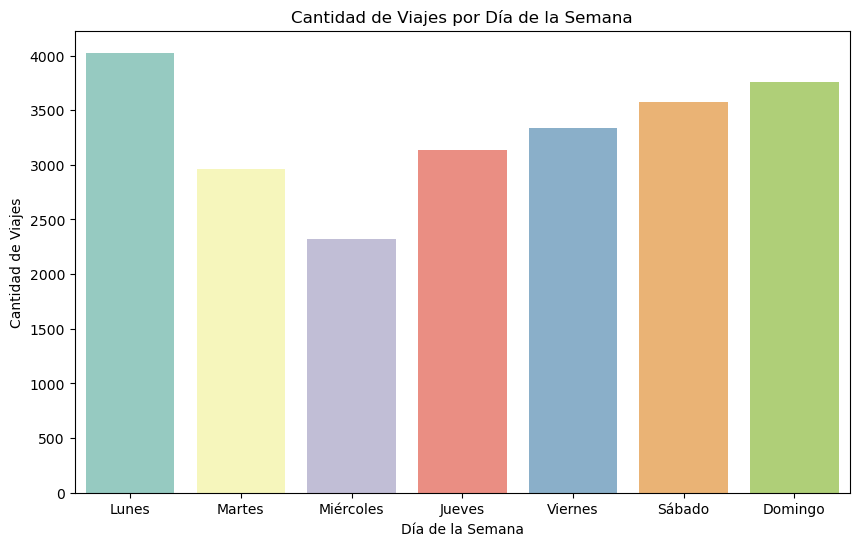

In [31]:
# Código para generar el gráfico de barras de la cantidad de viajes por día de la semana
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='dia_nombre', palette="Set3", order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.title('Cantidad de Viajes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Viajes')
plt.show()

# 2. ¿Cómo es la tendencia mes a mes? A qué se debe esto?

In [32]:
data['mes_nombre'] = data['start_at -- inicio_en'].dt.month.map({
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
})
data_groupby = data.groupby(['year', 'mes', 'mes_nombre']).agg({'journey_id -- id_viaje':'count'}).sort_values(['year', 'mes'])
data_groupby

journey_id -- id_viaje
year mes mes_nombre                        
2010 1   Enero                          575
     2   Febrero                        770
     3   Marzo                          986
     4   Abril                         1448
     5   Mayo                          1585
     6   Junio                         1939
     7   Julio                         1516
     8   Agosto                        2120
     9   Septiembre                    2598
     10  Octubre                       3240
     11  Noviembre                     3021
     12  Diciembre                     3313

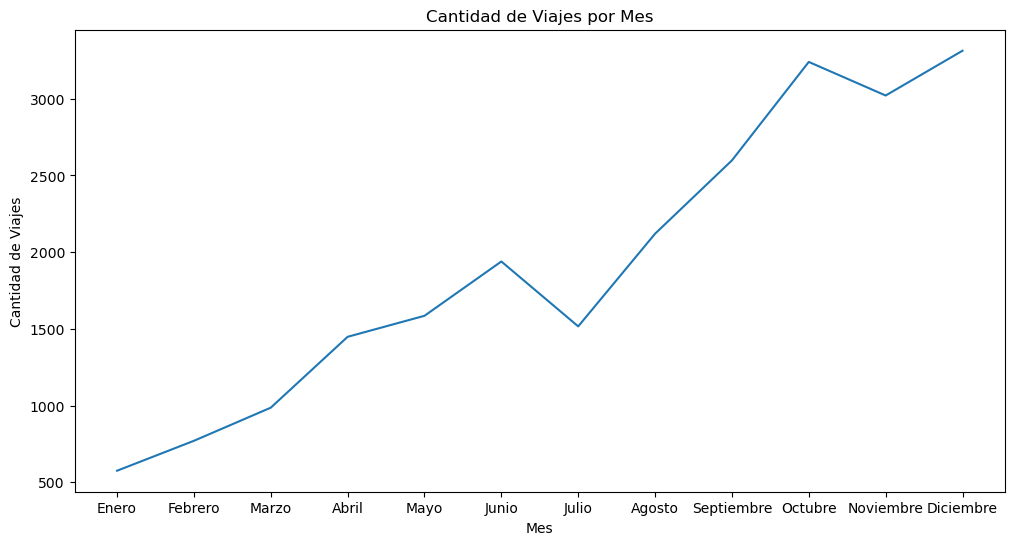

In [33]:
# Código para generar el gráfico de barras de la cantidad de viajes por mes
plt.figure(figsize=(12, 6))
sns.lineplot(data = data_groupby, x='mes_nombre', y='journey_id -- id_viaje')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Viajes')
plt.title('Cantidad de Viajes por Mes')
plt.show()

# 3. ¿Cómo varía la distribución a lo largo del día? Existen diferencias entre los distintos tipos de viajes?

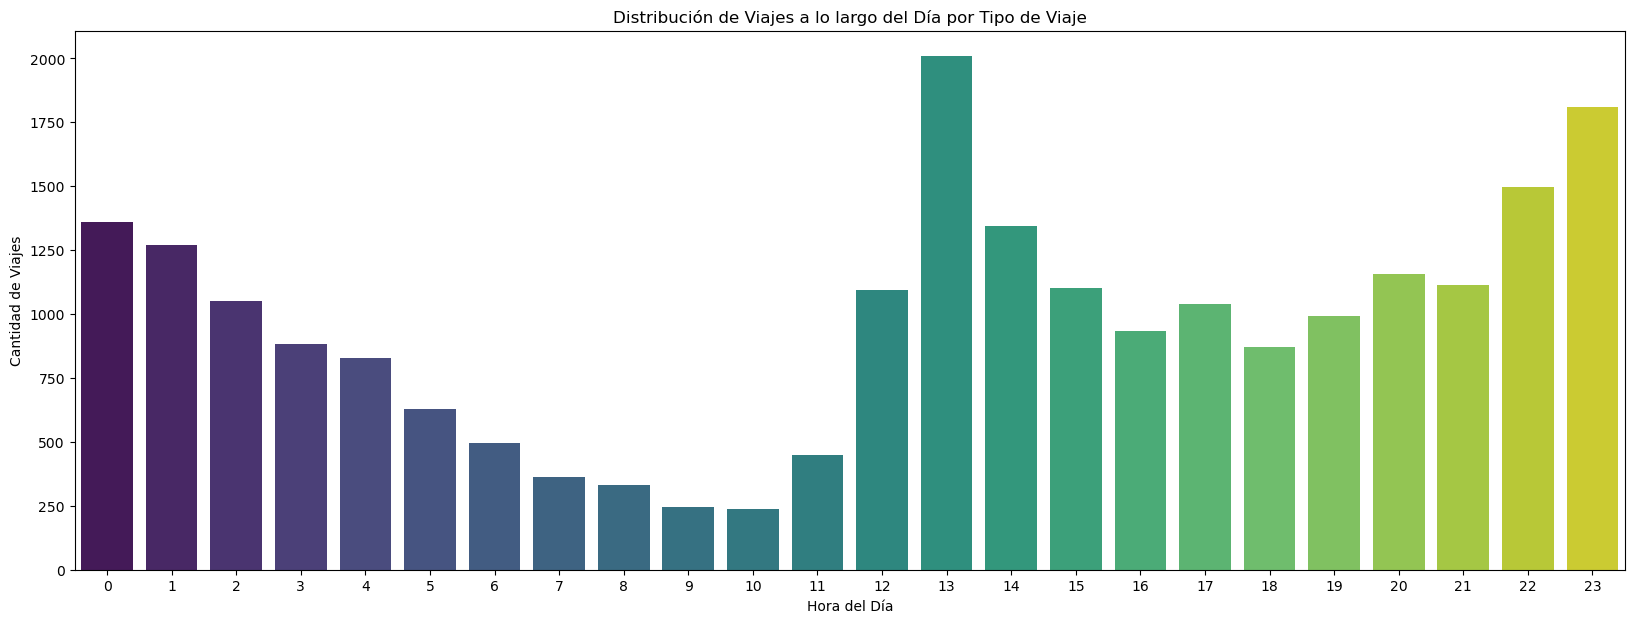

In [34]:
plt.figure(figsize=(20, 7))
sns.countplot(data=data, x='hour', palette="viridis")
plt.title('Distribución de Viajes a lo largo del Día por Tipo de Viaje')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Viajes')
plt.show()

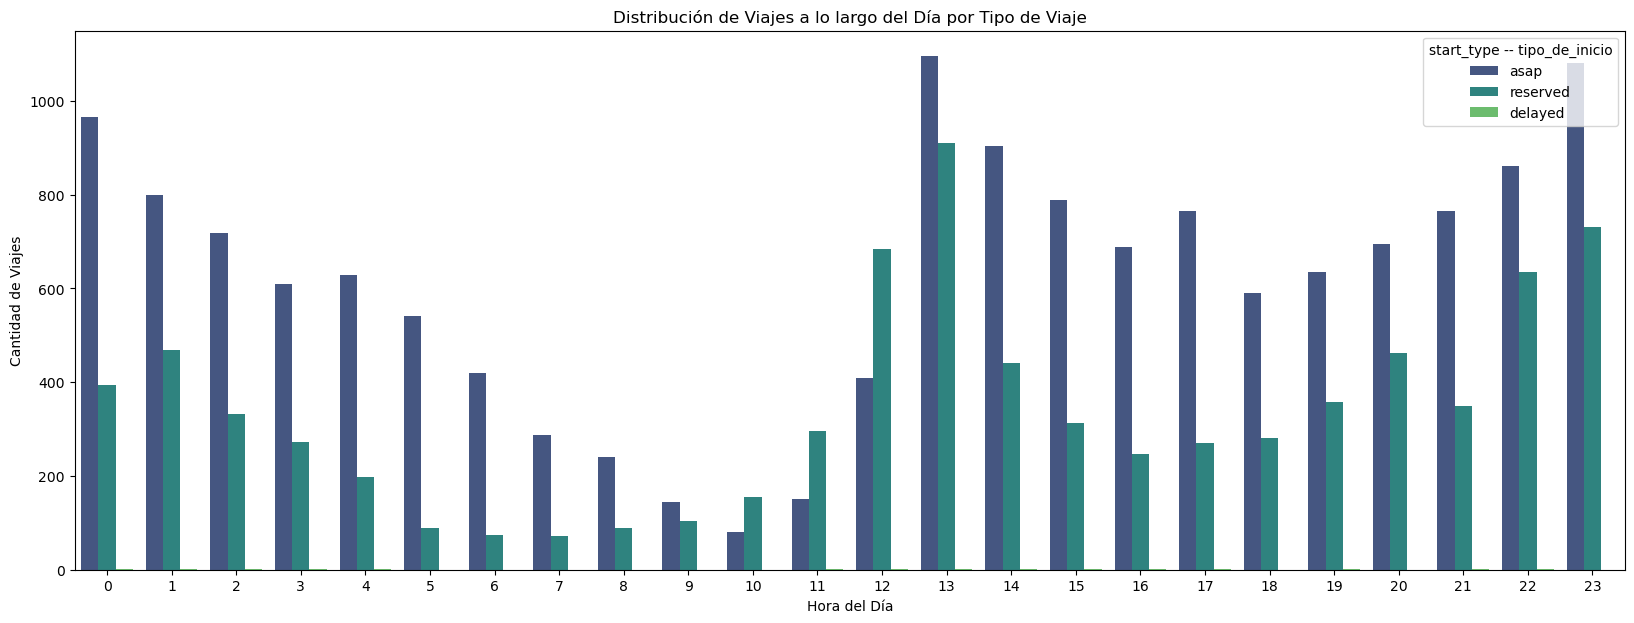

In [35]:
plt.figure(figsize=(20, 7))
sns.countplot(data=data, x='hour', hue='start_type -- tipo_de_inicio', palette="viridis")
plt.title('Distribución de Viajes a lo largo del Día por Tipo de Viaje')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Viajes')
plt.show()

# 4. ¿Si hacemos un gráfico diario existen patrones o comportamientos interesantes en algunos días en particular?

In [36]:
data_groupby = data.groupby(['DayOfWeek_i', 'dia_nombre']).agg({'journey_id -- id_viaje':'count'}).sort_values('DayOfWeek_i')
data_groupby

,,journey_id -- id_viaje
DayOfWeek_i,dia_nombre,
0,Lunes,4026
1,Martes,2965
2,Miércoles,2324
3,Jueves,3134
4,Viernes,3334
5,Sábado,3574
6,Domingo,3754


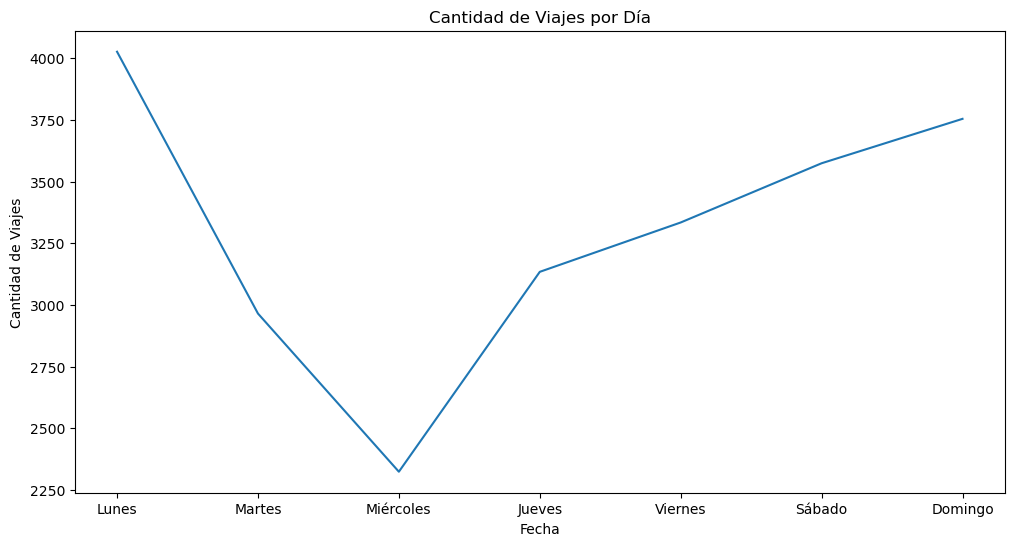

In [37]:
# Código para generar un gráfico de lineas de la cantidad de viajes por día
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_groupby, x='dia_nombre', y='journey_id -- id_viaje')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Viajes')
plt.title('Cantidad de Viajes por Día')
plt.show()

## Análisis Geo Espacial

In [38]:
import geopandas as gpd

In [39]:
# Convertimos nuestro dataframe a un GeoDataframe en pandas
data.head()

,journey_id -- id_viaje,user_id -- id_usuario,driver_id -- id_conductor,taxi_id -- id_taxi,icon -- icono,start_type -- tipo_de_inicio,start_at -- inicio_en,start_lat -- latitud_de_inicio,start_lon -- longitud_de_inicio,end_at -- fin_en,end_lat -- latitud_de_fin,end_lon -- longitud_de_fin,end_state -- estado_final,driver_start_lat -- latitud_de_inicio_del_conductor,driver_start_lon -- longitud_de_inicio_del_conductor,arrived_at -- llegada_en,currency -- moneda,price -- precio,price_distance -- distancia_de_precio,price_duration -- duracion_de_precio,distance -- distancia,duration -- duracion,cost -- costo,cost_distance -- distancia_de_costo,cost_duration -- duracion_de_costo,source -- fuente,driver_score -- puntuacion_del_conductor,rider_score -- puntuacion_del_pasajero,precio_soles,dia_nombre,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i,mes_nombre
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0,38.21,Martes,11,2010,2010-11-16,16,16,Tuesday,1,Noviembre
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",01/06/2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,0.00,Martes,6,2010,2010-06-01,0,1,Tuesday,1,Junio
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",31/05/2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,0.00,Lunes,5,2010,2010-05-31,5,31,Monday,0,Mayo
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",01/06/2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,0.00,Martes,6,2010,2010-06-01,0,1,Tuesday,1,Junio
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",12/09/2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11/09/2010 23:50,PEN,8227.0,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0,82.27,Sábado,9,2010,2010-09-11,23,11,Saturday,5,Septiembre


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 38 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   journey_id -- id_viaje                                23111 non-null  object        
 1   user_id -- id_usuario                                 23111 non-null  object        
 2   driver_id -- id_conductor                             19726 non-null  object        
 3   taxi_id -- id_taxi                                    19726 non-null  object        
 4   icon -- icono                                         23111 non-null  object        
 5   start_type -- tipo_de_inicio                          23111 non-null  object        
 6   start_at -- inicio_en                                 23111 non-null  datetime64[ns]
 7   start_lat -- latitud_de_inicio                        23111 non-null  object

In [41]:
# Tomaremos como referencia la ubicación en donde fue tomado el taxi: start_lat , start_lon. Antes debemos convertir a número
data[['start_lat -- latitud_de_inicio', 'start_lon -- longitud_de_inicio']]

,start_lat -- latitud_de_inicio,start_lon -- longitud_de_inicio
0,"-12,13983536","-77,02355957"
1,"-12,13874817","-76,99536133"
2,"-12,12453079","-77,02780151"
3,"-12,13885117","-76,99530029"
4,"-12,08995438","-76,92626953"
...,...,...
23106,"-12,08974075","-77,04699707"
23107,"-12,09253011","-77,02875271"
23108,"-12,1275637","-77,02642288"
23109,"-12,019468","-77,1077669"


In [42]:
data[['start_lat -- latitud_de_inicio', 'start_lon -- longitud_de_inicio']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   start_lat -- latitud_de_inicio   23111 non-null  object
 1   start_lon -- longitud_de_inicio  23111 non-null  object
dtypes: object(2)
memory usage: 361.2+ KB


In [43]:
data['latitude'] = data['start_lat -- latitud_de_inicio'].str.replace(',', '.')
data['longitude'] = data['start_lon -- longitud_de_inicio'].str.replace(',', '.')

In [44]:
data['latitude'] = data['latitude'].astype('float')
data['longitude'] = data['longitude'].astype('float')

In [45]:
data[['latitude', 'longitude']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   23111 non-null  float64
 1   longitude  23111 non-null  float64
dtypes: float64(2)
memory usage: 361.2 KB


In [46]:
"""
La línea de código que has proporcionado crea un GeoDataFrame a partir de un DataFrame existente llamado data.
Utiliza la función gpd.points_from_xy de GeoPandas para generar una geometría de puntos a partir de las columnas
de longitud 1 y latitud 2 de tu DataFrame original. Además, se especifica el sistema de referencia de coordenadas (CRS)
como "EPSG:4326", que corresponde a coordenadas geográficas en grados decimales. Esto es útil para trabajar con datos
geoespaciales y visualizarlos en mapas.
"""
data_geo = gpd.GeoDataFrame(
    data, geometry = gpd.points_from_xy(data.longitude, data.latitude), crs="EPSG:4326"
)

In [47]:
data_geo.head()

,journey_id -- id_viaje,user_id -- id_usuario,driver_id -- id_conductor,taxi_id -- id_taxi,icon -- icono,start_type -- tipo_de_inicio,start_at -- inicio_en,start_lat -- latitud_de_inicio,start_lon -- longitud_de_inicio,end_at -- fin_en,end_lat -- latitud_de_fin,end_lon -- longitud_de_fin,end_state -- estado_final,driver_start_lat -- latitud_de_inicio_del_conductor,driver_start_lon -- longitud_de_inicio_del_conductor,arrived_at -- llegada_en,currency -- moneda,price -- precio,price_distance -- distancia_de_precio,price_duration -- duracion_de_precio,distance -- distancia,duration -- duracion,cost -- costo,cost_distance -- distancia_de_costo,cost_duration -- duracion_de_costo,source -- fuente,driver_score -- puntuacion_del_conductor,rider_score -- puntuacion_del_pasajero,precio_soles,dia_nombre,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i,mes_nombre,latitude,longitude,geometry
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0,38.21,Martes,11,2010,2010-11-16,16,16,Tuesday,1,Noviembre,-12.139835,-77.023560,POINT (-77.02356 -12.13984)
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",01/06/2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,0.00,Martes,6,2010,2010-06-01,0,1,Tuesday,1,Junio,-12.138748,-76.995361,POINT (-76.99536 -12.13875)
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",31/05/2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,0.00,Lunes,5,2010,2010-05-31,5,31,Monday,0,Mayo,-12.124531,-77.027802,POINT (-77.02780 -12.12453)
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",01/06/2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,0.00,Martes,6,2010,2010-06-01,0,1,Tuesday,1,Junio,-12.138851,-76.995300,POINT (-76.99530 -12.13885)
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",12/09/2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11/09/2010 23:50,PEN,8227.0,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0,82.27,Sábado,9,2010,2010-09-11,23,11,Saturday,5,Septiembre,-12.089954,-76.926270,POINT (-76.92627 -12.08995)


In [48]:
type(data_geo)

geopandas.geodataframe.GeoDataFrame

In [49]:
# Leemos información de los distritos
lima_dis = gpd.read_file('https://raw.githubusercontent.com/joseluisq/peru-geojson-datasets/master/lima_callao_distritos.geojson')

In [50]:
lima_dis

,id,departamento,provincia,distrito,institucion,distrito2,geometry
0,2,LIMA,LIMA,SAN BORJA,IGN,San Borja,"MULTIPOLYGON (((-76.98587 -12.08173, -76.98585..."
1,6,LIMA,LIMA,JESUS MARIA,IGN,NaN,"MULTIPOLYGON (((-77.04242 -12.08297, -77.04311..."
2,7,LIMA,LIMA,PACHACAMAC,IGN,NaN,"MULTIPOLYGON (((-76.87588 -12.07350, -76.87582..."
3,10,LIMA,LIMA,SAN LUIS,IGN,NaN,"MULTIPOLYGON (((-76.99780 -12.06084, -76.99810..."
4,12,LIMA,LIMA,LA MOLINA,IGN,NaN,"MULTIPOLYGON (((-76.94139 -12.06207, -76.94137..."
5,13,LIMA,LIMA,ANCON,IGN,NaN,"MULTIPOLYGON (((-77.06501 -11.57523, -77.06499..."
6,17,LIMA,LIMA,VILLA EL SALVADOR,IGN,NaN,"MULTIPOLYGON (((-76.94057 -12.18535, -76.94042..."
7,32,LIMA,LIMA,SANTIAGO DE SURCO,IGN,Santiago de Surco,"MULTIPOLYGON (((-76.95742 -12.07604, -76.95741..."
8,38,LIMA,LIMA,ATE,IGN,NaN,"MULTIPOLYGON (((-76.81686 -12.00133, -76.81396..."
9,39,CALLAO,CALLAO,CALLAO,IGN,NaN,"MULTIPOLYGON (((-77.12849 -11.93928, -77.12746..."


In [51]:
# Join espacial para agregar información de distritos:
"""
sjoin es un método en GeoPandas que se utiliza para realizar una unión espacial entre dos GeoDataFrames. En este caso,
la línea de código que has proporcionado está realizando una unión espacial entre el GeoDataFrame data_geo y un
subconjunto de columnas de otro GeoDataFrame llamado lima_dis, que incluye las columnas 'provincia', 'distrito' y
'geometry'. La unión espacial se basa en la geometría de los datos, lo que permite identificar la relación espacial entre los
datos de ambos GeoDataFrames y asignar atributos espaciales en función de esa relación, como por ejemplo, asignar a
qué distrito pertenece cada punto geoespacial de data_geo en base a la información de lima_dis.
"""
data_geo_dis = data_geo.sjoin(lima_dis[['provincia', 'distrito', 'geometry']])

In [52]:
data_geo_dis

,journey_id -- id_viaje,user_id -- id_usuario,driver_id -- id_conductor,taxi_id -- id_taxi,icon -- icono,start_type -- tipo_de_inicio,start_at -- inicio_en,start_lat -- latitud_de_inicio,start_lon -- longitud_de_inicio,end_at -- fin_en,end_lat -- latitud_de_fin,end_lon -- longitud_de_fin,end_state -- estado_final,driver_start_lat -- latitud_de_inicio_del_conductor,driver_start_lon -- longitud_de_inicio_del_conductor,arrived_at -- llegada_en,currency -- moneda,price -- precio,price_distance -- distancia_de_precio,price_duration -- duracion_de_precio,distance -- distancia,duration -- duracion,cost -- costo,cost_distance -- distancia_de_costo,cost_duration -- duracion_de_costo,source -- fuente,driver_score -- puntuacion_del_conductor,rider_score -- puntuacion_del_pasajero,precio_soles,dia_nombre,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i,mes_nombre,latitude,longitude,geometry,index_right,provincia,distrito
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0,38.21,Martes,11,2010,2010-11-16,16,16,Tuesday,1,Noviembre,-12.139835,-77.023560,POINT (-77.02356 -12.13984),38,LIMA,BARRANCO
59,fdf02c2d7b2dd9c0c7eb0b0b729cc655,649d38ea6680a3f6ee4a4b734f508d9d,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,asap,2010-06-02 10:29:00,"-12,14313126","-77,01556396",02/06/2010 11:07,"-12,13913727","-76,99572754",drop off,"-12,11695433","-77,02999592",02/06/2010 10:50,PEN,1942.0,1797.0,145.0,5616.0,174.0,1700.0,1348.0,107.0,iPhone,5.0,5.0,19.42,Miércoles,6,2010,2010-06-02,10,2,Wednesday,2,Junio,-12.143131,-77.015564,POINT (-77.01556 -12.14313),38,LIMA,BARRANCO
108,443ccdfd1345a761a544f8cf428e3bca,761a1b1e8e4103f2ac5a425564328a45,NaN,NaN,executive,reserved,2010-10-12 06:05:00,"-12,14638901","-77,01852417",12/10/2010 5:20,"-12,10471725","-76,99841309",rider cancel,NaN,NaN,NaN,PEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iPhone,NaN,NaN,0.00,Martes,10,2010,2010-10-12,6,12,Tuesday,1,Octubre,-12.146389,-77.018524,POINT (-77.01852 -12.14639),38,LIMA,BARRANCO
109,532278dfa8891ad6dd958337e4cc9a16,761a1b1e8e4103f2ac5a425564328a45,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,reserved,2010-10-12 06:30:00,"-12,146492","-77,01852417",12/10/2010 6:42,"-12,10716248","-76,99749756",drop off,"-12,12915486","-77,03593338",12/10/2010 6:24,PEN,2557.0,2557.0,0.0,7990.0,0.0,1918.0,1918.0,0.0,iPhone,2.0,3.0,25.57,Martes,10,2010,2010-10-12,6,12,Tuesday,1,Octubre,-12.146492,-77.018524,POINT (-77.01852 -12.14649),38,LIMA,BARRANCO
152,f622a9397b85b5c9c0ef938c5d57be64,f420a3daee4777127e9eaa907eb5818e,ae06c34243f741e203e97c48ebcbd9da,f622a9397b85b5c9c0ef938c5d592020,executive,asap,2010-09-07 05:13:00,"-12,13978577","-77,02429199",07/09/2010 5:47,"-12,11179352","-77,0357666",drop off,"-12,08104022","-77,06651466",07/09/2010 5:35,PEN,1700.0,1498.0,1.0,4680.0,1.0,1450.0,1123.0,1.0,iPhone,NaN,5.0,17.00,Martes,9,2010,2010-09-07,5,7,Tuesday,1,Septiembre,-12.139786,-77.024292,POINT (-77.02429 -12.13979),38,LIMA,BARRANCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15757,d439fbb315b2966b8c84e219ecda2701,dd23cf0ef33ae44e0c0b4c756e1fe4e8,eef4aeee867d60d44e1d077d16054b6a,294e869d187357cad25b8af65aa860e8,executive,asap,2010-12-01 00:39:00,"-12,0274637","-76,99573103",01/12/2010 1:42,"-12,03134817","-77,02858239",drop off,"-12,0278311","-76,99483568",01/12/2010 0:40,PEN,5479.0,3687.0,1792.0,11523.0,2141.0,4092.0,2766.0,1326.0,Android,5.0,5.0,54.79,Miércoles,12,2010,2010-12-01,0,1,Wednesday,2,Diciembre,-12.027464,-76.995731,POINT (-76.99573 -12.02746),44,LIMA,EL AGUSTINO
16235,1d8ba0bdacccf2d0

In [53]:
# Cantidad de viajes por distrito
data_geo_dis.groupby('distrito').agg({'journey_id -- id_viaje':'count', 'price -- precio':'mean'}).reset_index().sort_values('journey_id -- id_viaje',ascending=False)

,distrito,journey_id -- id_viaje,price -- precio
30,SAN ISIDRO,5643,2540.388789
38,SANTIAGO DE SURCO,5134,2602.895755
22,MIRAFLORES,4925,2447.356731
29,SAN BORJA,1233,3329.310855
39,SURQUILLO,981,2044.014493
12,LA MOLINA,911,3384.642377
4,CALLAO,856,5279.665459
1,BARRANCO,624,2718.758170
16,LIMA,478,2733.158351
11,JESUS MARIA,374,2576.541311


5. Realize gráficos y análisis usando la información Geoespacial (8 puntos).
* Cantidad de viajes realizados por distrito y su relación con precio, distancia, recorrida.
* Existe algún patrón diferenciado de taxis tomados en ciertos distritos a lo largo del día.
* Con la información de end_lat end_lon se podría aproximar la distancia total (distancia euclidiana) del viaje. Este valor guarda relación con la columna distance?
* Hay patronoes diferenciados sobre el uso de web,Android o Iphone por cada distrito?
* Los viajes en los distritos céntricos en la ciudad son generalmente más cortos o más largos, y hay alguna influencia en el precio?
* Se observa que hay muchos viajes que inician o terminan en el Aeropuerto. Existe algún patrón desde/hacia donde van generalmente esos viajes?
* Incluya cualquier otra información relevante que se puede derivar del análisis geo espacial.
* Puede usar https://kepler.gl/demo para visualizar los datos

justificacion

In [54]:
# code

# 1. Cantidad de viajes realizados por distrito y su relación con precio, distancia, recorrida.

In [55]:
# Cantidad de viajes, precio y distancia por distrito
analysis_result = data_geo_dis.groupby('distrito').agg({'journey_id -- id_viaje':'count', 'price -- precio':'mean', 'distance -- distancia':'mean'}).reset_index().sort_values('journey_id -- id_viaje',ascending=False)
analysis_result

,distrito,journey_id -- id_viaje,price -- precio,distance -- distancia
30,SAN ISIDRO,5643,2540.388789,11107.159311
38,SANTIAGO DE SURCO,5134,2602.895755,9710.817342
22,MIRAFLORES,4925,2447.356731,7543.368098
29,SAN BORJA,1233,3329.310855,14280.082034
39,SURQUILLO,981,2044.014493,21466.870637
12,LA MOLINA,911,3384.642377,18598.272525
4,CALLAO,856,5279.665459,13086.206483
1,BARRANCO,624,2718.758170,7221.827642
16,LIMA,478,2733.158351,6841.161359
11,JESUS MARIA,374,2576.541311,6308.131285


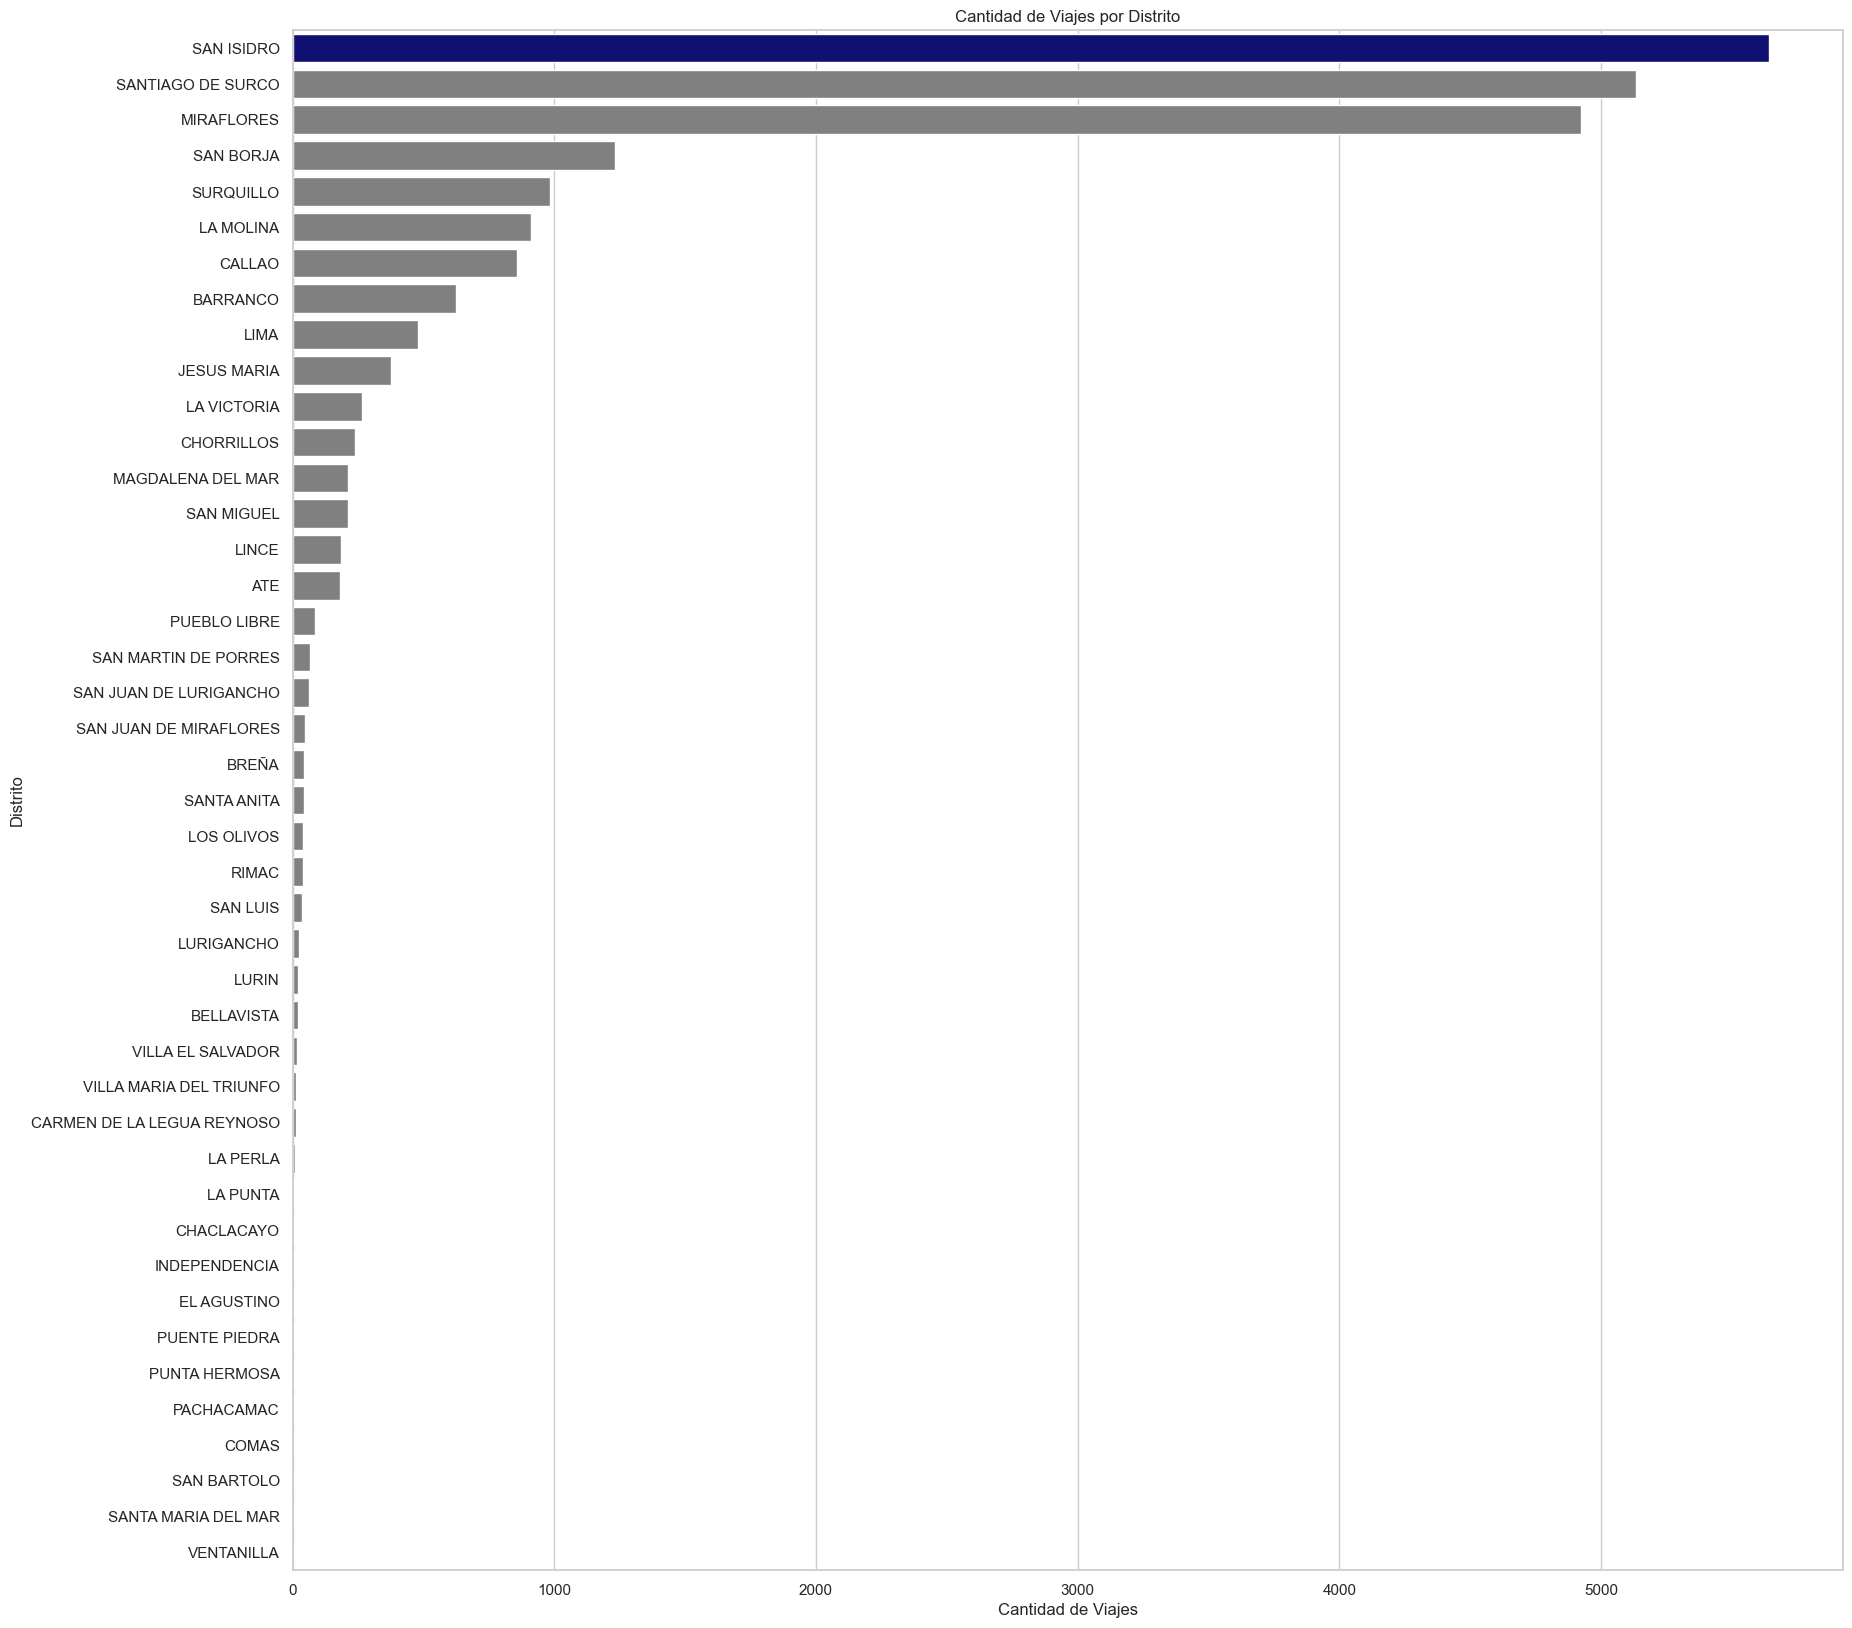

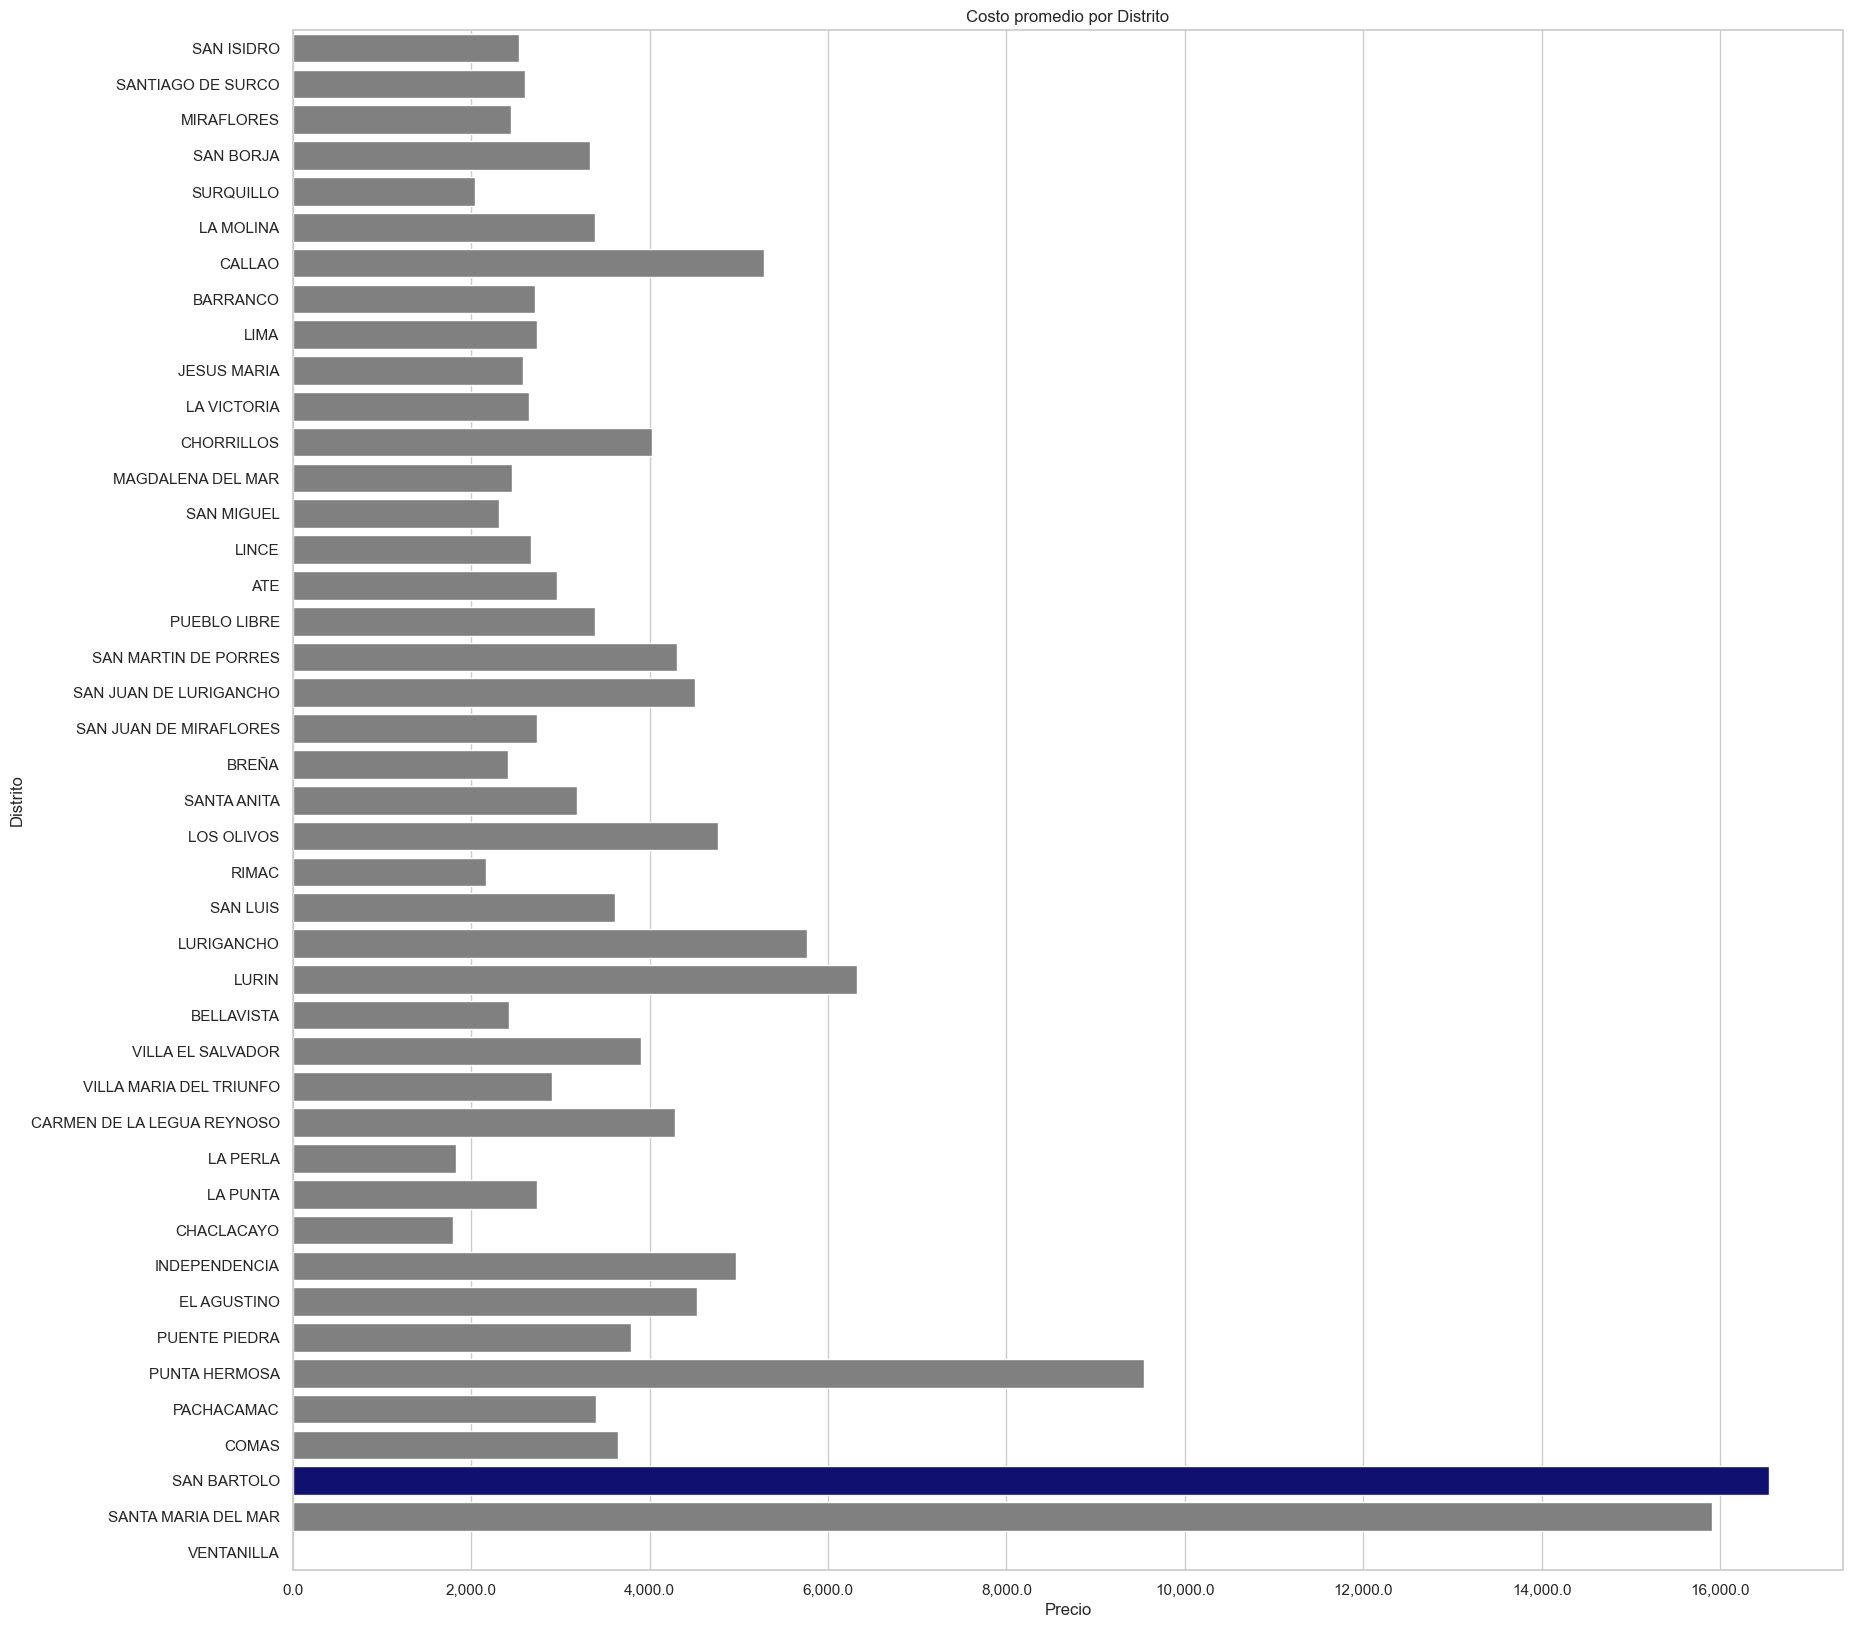

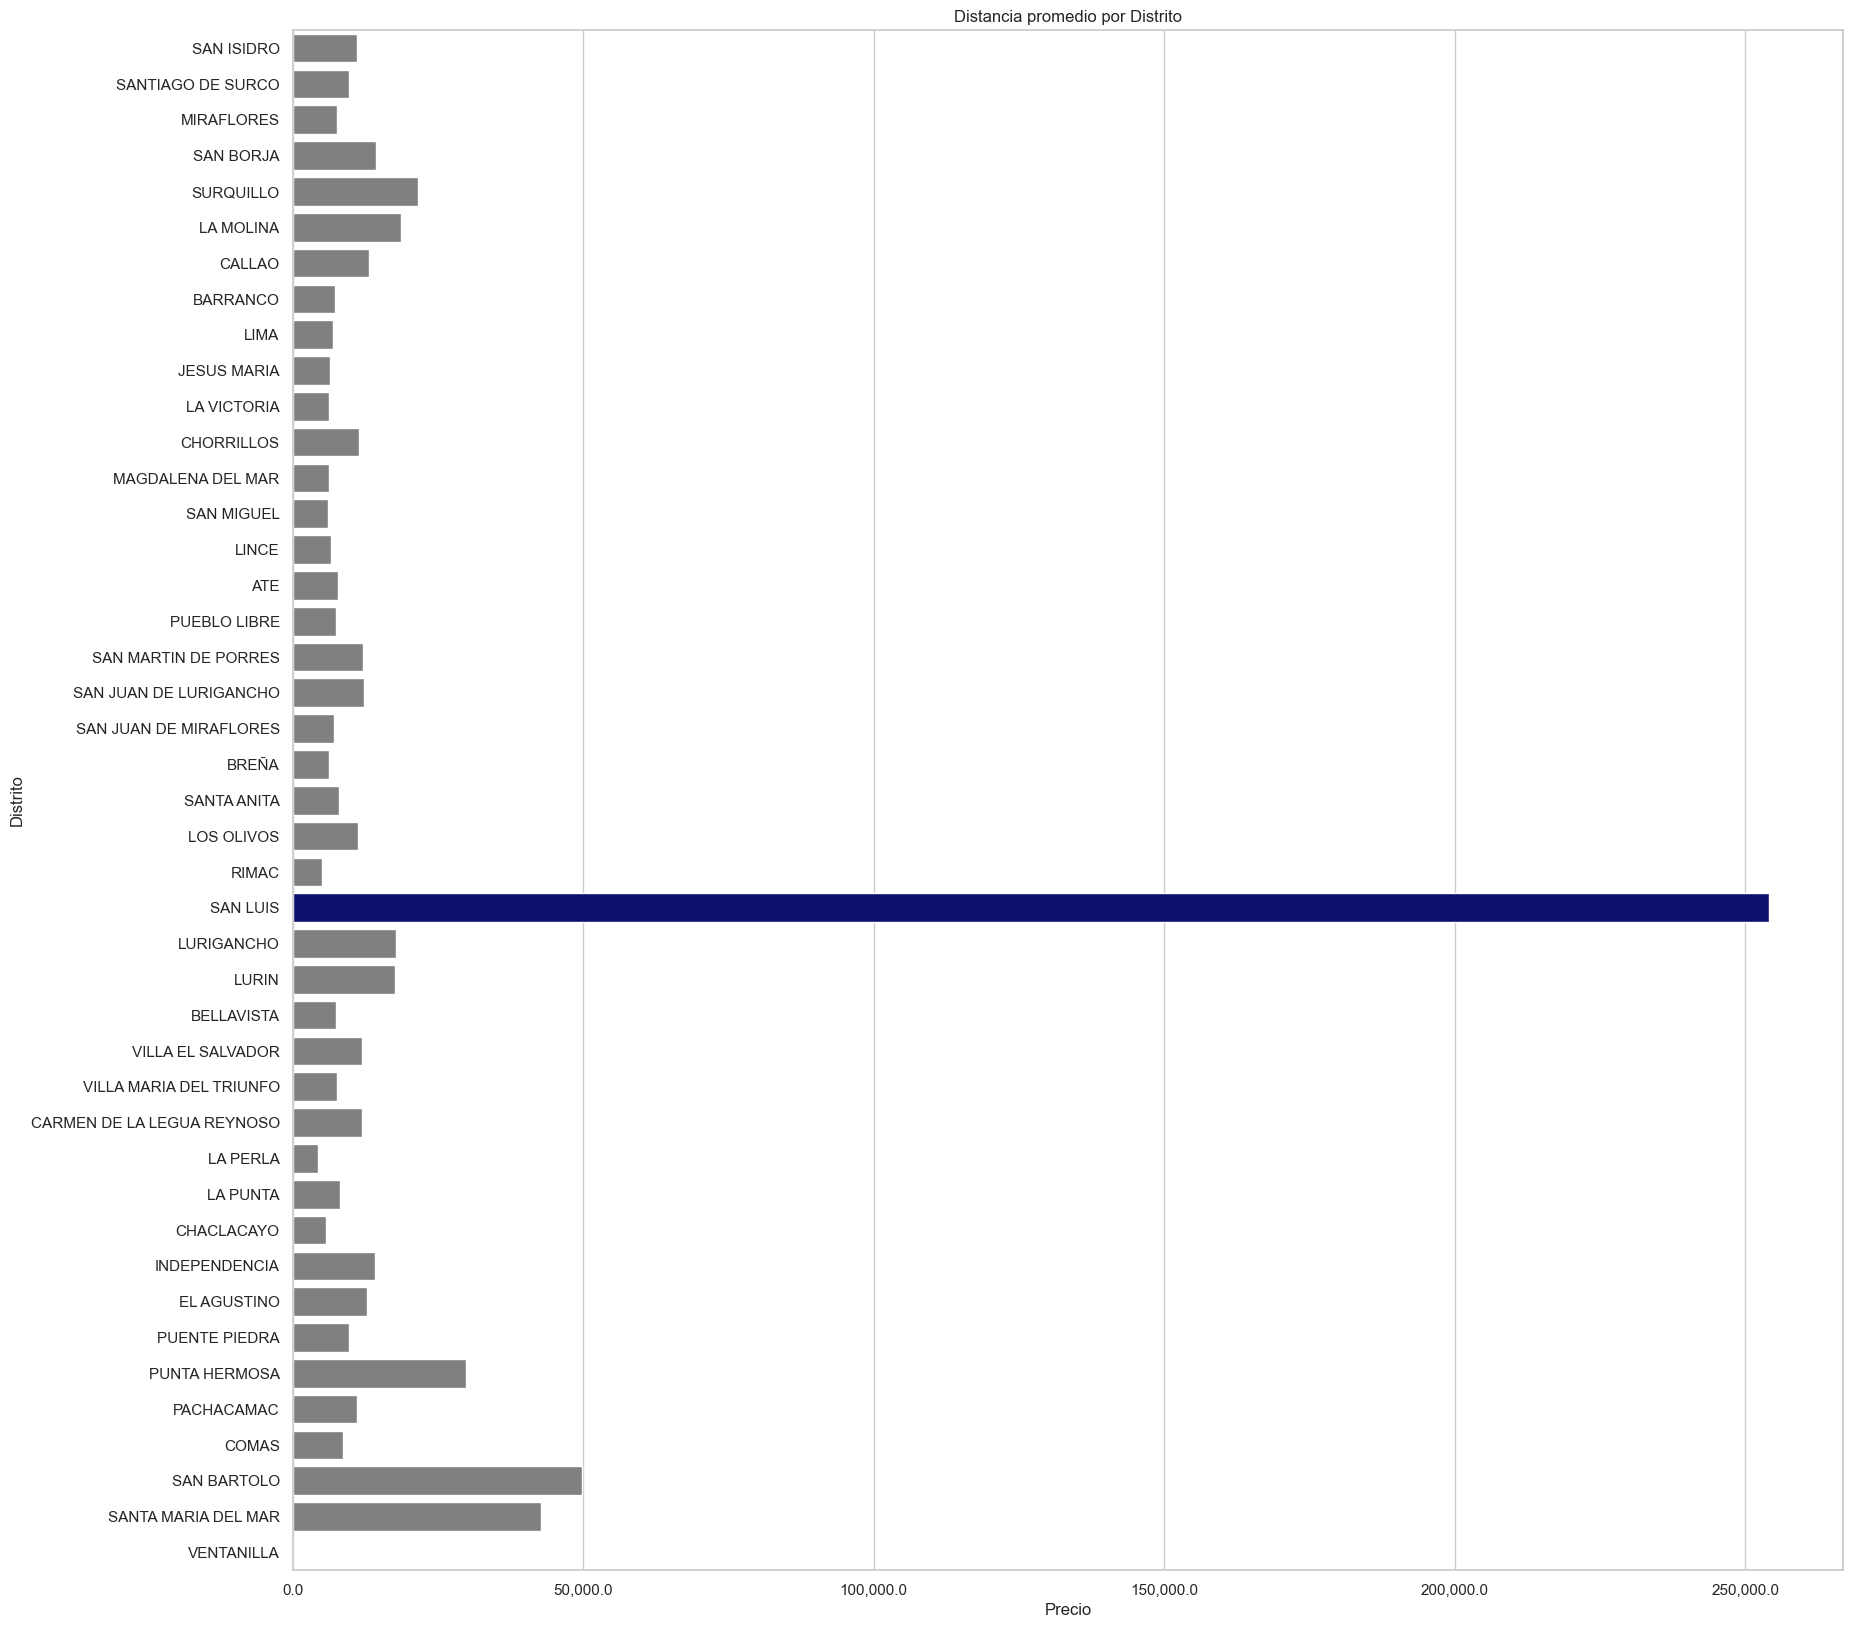

In [56]:
# Visualizar los resultados del análisis con gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))
sns.barplot(x='journey_id -- id_viaje', y='distrito', data=analysis_result, palette=["grey" if y != "SAN ISIDRO" else "navy" for y in analysis_result['distrito']])
plt.title('Cantidad de Viajes por Distrito')
plt.xlabel('Cantidad de Viajes')
plt.ylabel('Distrito')
plt.show()

sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))
sns.barplot(x='price -- precio', y='distrito', data=analysis_result, palette=["grey" if y != "SAN BARTOLO" else "navy" for y in analysis_result['distrito']])
plt.title('Costo promedio por Distrito')
plt.xlabel('Precio')
plt.ylabel('Distrito')
# Formatear los números en el eje x para mostrar el valor completo
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(float(x))))
plt.show()

sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))
sns.barplot(x='distance -- distancia', y='distrito', data=analysis_result, palette=["grey" if y != "SAN LUIS" else "navy" for y in analysis_result['distrito']])
plt.title('Distancia promedio por Distrito')
plt.xlabel('Precio')
plt.ylabel('Distrito')
# Formatear los números en el eje x para mostrar el valor completo
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(float(x))))
plt.show()

# 2. Existe algún patrón diferenciado de taxis tomados en ciertos distritos a lo largo del día.

In [57]:
pivot_table = data_geo_dis.pivot_table(index='distrito', columns='hour', values='journey_id -- id_viaje', aggfunc='count')
pivot_table

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
distrito,,,,,,,,,,,,,,,,,,,,,,,,
ATE,8.0,8.0,6.0,1.0,2.0,1.0,6.0,2.0,5.0,3.0,1.0,1.0,NaN,2.0,5.0,10.0,12.0,13.0,6.0,19.0,11.0,26.0,17.0,17.0
BARRANCO,37.0,28.0,27.0,40.0,57.0,65.0,45.0,40.0,34.0,13.0,9.0,12.0,14.0,10.0,14.0,8.0,11.0,13.0,13.0,16.0,18.0,33.0,20.0,47.0
BELLAVISTA,4.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,4.0
BREÑA,NaN,2.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,2.0,NaN,2.0,1.0,6.0,2.0,1.0,1.0,3.0,2.0,3.0,2.0,2.0,6.0,NaN
CALLAO,42.0,45.0,52.0,82.0,111.0,50.0,17.0,4.0,11.0,7.0,18.0,30.0,37.0,21.0,43.0,26.0,27.0,26.0,14.0,21.0,17.0,29.0,43.0,83.0
CARMEN DE LA LEGUA REYNOSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,2.0,1.0
CHACLACAYO,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,NaN
CHORRILLOS,21.0,23.0,13.0,13.0,9.0,5.0,9.0,6.0,6.0,9.0,4.0,6.0,10.0,7.0,5.0,1.0,13.0,14.0,8.0,8.0,3.0,12.0,19.0,13.0
COMAS,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


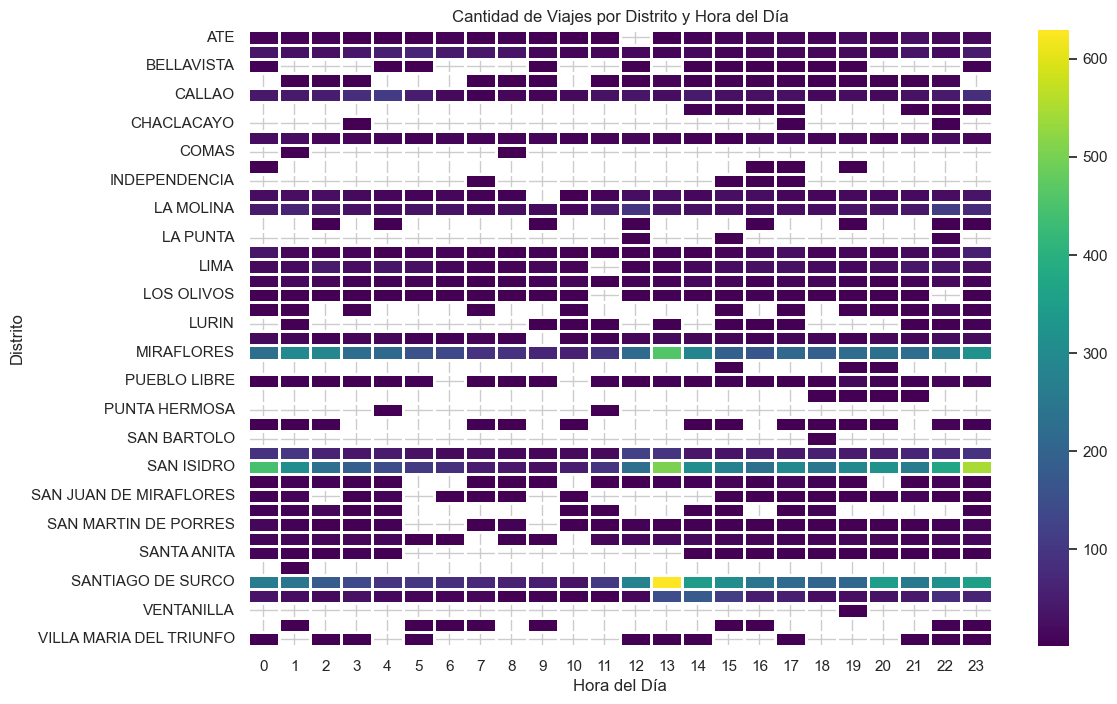

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', linecolor='white', linewidth=1)
plt.title('Cantidad de Viajes por Distrito y Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Distrito')
plt.show()